<a href="https://colab.research.google.com/github/piyush1856/piyush1856-Business-Case-Delhivery---Feature-Engineering/blob/main/Business_Case_Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Delhivery, India's largest and fastest-growing logistics company, plays a crucial role in the country's e-commerce and supply chain ecosystems. With its fully integrated operations, Delhivery leverages cutting-edge technology and data-driven approaches to enhance the efficiency, quality, and profitability of its services. This business case focuses on feature engineering from raw data, aiming to assist Delhivery’s data science team in building accurate forecasting models and uncovering valuable insights from its operations.

# **Background**

As Delhivery continues to expand its reach and operational capacity, the company generates massive amounts of data through its logistics pipelines. Efficient processing and analysis of this data is vital to ensure the company's logistics operations remain competitive. Key challenges such as missing data, outliers, and the need for data normalization must be addressed to gain actionable insights. By engineering meaningful features, Delhivery can enhance its forecasting models, leading to better route planning, improved delivery times, and optimized resource utilization.

# **Business Problem**

Delhivery's data engineering pipelines generate raw delivery data, which is fragmented across multiple rows for each trip. This data needs to be aggregated and processed to form a cohesive view of each trip. Additionally, missing values, outliers, and unknown fields need to be addressed before this data can be used for accurate forecasting models. The business seeks to refine its data processing to extract valuable features that can improve predictions, delivery accuracy, and operational efficiency.

# **Objective**

The primary objective of this case study is to clean, manipulate, and engineer useful features from Delhivery’s raw delivery data. By aggregating, normalizing, and performing statistical analysis, this process will provide the data science team with a solid foundation for building accurate forecasting models. The outcome should help Delhivery streamline its logistics processes, reduce delivery times, and improve customer satisfaction.

# **Dataset Description**

The dataset provided by Delhivery captures detailed information about its delivery operations, encompassing various stages of the logistics process. Each row represents a segment of a trip, and multiple segments together represent the complete journey of a package from the source center to the destination center. The dataset contains both categorical and numerical features, as well as timestamps that will be crucial for deriving new features. Key columns in the dataset include:

- **data**: Tells whether the data is testing or training data.
- **trip_creation_time**: Timestamp of trip creation.
- **route_schedule_uuid**: Unique ID for a particular route schedule.
- **route_type**: Transportation type.
  - **FTL (Full Truck Load)**: Shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way.
  - **Carting**: Handling system consisting of small vehicles (carts).
- **trip_uuid**: Unique ID given to a particular trip (A trip may include different source and destination centers).
- **source_center**: Source ID of trip origin.
- **source_name**: Source Name of trip origin.
- **destination_center**: Destination ID.
- **destination_name**: Destination Name.
- **od_start_time**: Trip start time.
- **od_end_time**: Trip end time.
- **start_scan_to_end_scan**: Time taken to deliver from source to destination.
- **is_cutoff**: Unknown field.
- **cutoff_factor**: Unknown field.
- **cutoff_timestamp**: Unknown field.
- **actual_distance_to_destination**: Distance in kilometers between source and destination warehouse.
- **actual_time**: Actual cumulative time taken to complete the delivery.
- **osrm_time**: Time calculated by the Open Source Routing Machine (OSRM) for the shortest path between points on a map (includes traffic, road types, etc.)—cumulative.
- **osrm_distance**: Distance calculated by OSRM for the shortest path between points on a map (includes traffic, road types, etc.)—cumulative.
- **factor**: Unknown field.
- **segment_actual_time**: Time taken by a segment of the package delivery.
- **segment_osrm_time**: OSRM time for a segment of the package delivery.
- **segment_osrm_distance**: OSRM distance for a segment of the package delivery.
- **segment_factor**: Unknown field.


The dataset is split into training and testing data, indicated by the data column. To optimize the analysis, it is important to clean and preprocess the data, merge segments into complete trips, and derive meaningful features from timestamps and location data. This will allow for comprehensive feature engineering, helping Delhivery enhance its predictive modeling and logistics optimization efforts.

# **Approach for Delhivery Feature Engineering Case Study**

### **1. Data Understanding and Initial Exploration**
- **Objective**: Understand the dataset, its structure, and the relationships between various fields.
  - Load the dataset and inspect its basic structure using functions like `.head()`, `.info()`, and `.describe()`.
  - Identify the data types for each column and check for any discrepancies.
  - Understand the role of each column based on the problem statement and define the target variables for feature engineering and analysis.

### **2. Data Cleaning**
- **Objective**: Handle missing data, inconsistencies, and unknown fields.
  - **Missing values**: Use `.isnull().sum()` to identify missing values across all columns.
  - Impute missing values where appropriate, using mean, median, or mode for numerical data, or forward/backward filling for categorical or time-based data.
  - Drop columns that provide no meaningful insights or contain an excessive amount of missing data (e.g., fields like `cutoff_factor`, `factor`, `segment_factor` unless explored further).
  - Convert relevant time columns (e.g., `trip_creation_time`, `od_start_time`, `od_end_time`) to the proper `datetime` format for easier manipulation.

### **3. Data Aggregation and Feature Creation**
- **Objective**: Merge rows and aggregate columns to prepare meaningful features for analysis.
  - **Row merging**: Merge rows based on `trip_uuid`, `source_center`, and `destination_center` to form complete trip data. Use `groupby` and `aggregate` functions to summarize fields:
    - For numerical fields (e.g., `actual_time`, `osrm_time`, `actual_distance_to_destination`), use aggregation methods like `sum()`, `mean()`, and `cumsum()` where applicable.
    - For categorical fields, keep the `first()` or `last()` values if aggregation does not make sense.
  - **Feature extraction**: Derive new features by manipulating existing columns:
    - Extract **date and time features** from `trip_creation_time` (e.g., month, day, year).
    - Calculate **od_time_diff_hour** as the difference between `od_start_time` and `od_end_time` to track the duration of each trip.
    - Extract **city, place code, and state** from `source_name` and `destination_name` using string manipulation (e.g., splitting on dashes).

### **4. Handling Categorical and Numerical Variables**
- **Objective**: Prepare data for modeling by handling categorical and numerical fields appropriately.
  - **Categorical variables**: Apply one-hot encoding for columns like `route_type`, which include `FTL` and `Carting` categories.
  - **Numerical variables**: Normalize or standardize numerical fields (e.g., `actual_time`, `osrm_time`, `osrm_distance`, `actual_distance_to_destination`) using `MinMaxScaler` or `StandardScaler` to ensure the values are comparable and not influenced by scale differences.

### **5. Outlier Detection and Treatment**
- **Objective**: Identify and handle outliers to improve the quality of the dataset.
  - Perform **visual analysis** (e.g., boxplots, histograms) to detect outliers in key numerical fields such as `actual_time`, `osrm_time`, and `actual_distance_to_destination`.
  - Handle outliers using the **IQR method**: Calculate the Interquartile Range (IQR) and remove or adjust data points that fall outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR].

### **6. Hypothesis Testing and Visual Analysis**
- **Objective**: Conduct hypothesis testing and visualize relationships between key variables.
  - Compare the aggregated values of `actual_time` with `osrm_time` to determine discrepancies between estimated and actual delivery times.
  - Perform **hypothesis testing** (e.g., t-tests) and visual analysis (e.g., scatter plots, line graphs) between:
    - **Aggregated actual time** and **aggregated OSRM time**.
    - **Aggregated actual time** and **aggregated segment actual time**.
    - **Aggregated OSRM distance** and **aggregated segment OSRM distance**.
    - **Aggregated OSRM time** and **aggregated segment OSRM time**.

### **7. Insights and Business Recommendations**
- **Objective**: Provide actionable insights based on data analysis and feature engineering.
  - Identify patterns, such as:
    - The most common source-destination corridors.
    - The busiest routes or locations based on trip frequency and time.
    - Discrepancies between actual and OSRM-predicted times, indicating areas where logistics optimization is needed.
  - Provide **business recommendations**:
    - Improve route efficiency based on time and distance patterns.
    - Prioritize resources on high-traffic corridors or routes where OSRM estimates deviate significantly from actuals.
    - Address factors contributing to delays in certain segments, potentially leading to better time and distance predictions in the future.

### **8. Final Model Preparation and Submission**
- **Objective**: Prepare the final dataset and submit the case study.
  - Ensure the dataset is cleaned, transformed, and feature-engineered to the point where it can be used for further modeling.
  - Convert the Jupyter Notebook into a PDF and submit along with insights and recommendations in the required format.


# **Data Understanding and Initial Exploration**

## **Import Libraries and Dataset**

In [104]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot

# Statistical analysis
from scipy import stats
from scipy.stats import shapiro, levene, chi2_contingency, kruskal, skew, kurtosis, ttest_rel, boxcox

from statsmodels.graphics.gofplots import qqplot

# Misc
import random
import re

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

# Display settings for better readability of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set the style for plots
sns.set(style="whitegrid")

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [105]:
# Load the CSV file from the URL
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181"
df = pd.read_csv(url)

## **Initial Exploration**

In [106]:
# Displaying the first few rows of the dataset to check the structure
df.sample(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
82817,training,2018-09-21 21:19:57.967051,thanos::sroute:67c77992-49e3-4594-9a75-9861ef0...,FTL,trip-153756479796679502,IND131028AAB,Sonipat_Kundli_H (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-23 12:42:32.876495,2018-09-23 17:39:05.554336,296.0,True,88,2018-09-23 16:02:12,88.370241,88.0,67.0,94.6333,1.313433,24.0,18.0,24.6173,1.333333
30843,training,2018-09-24 00:02:45.015540,thanos::sroute:3f001d56-e933-4ba1-a7cf-26828f7...,Carting,trip-153774736501516700,IND561202AAB,Pavagada_PnukndRD_D (Karnataka),IND515134AAA,Puttaprthi_Gokulam_D (Andhra Pradesh),2018-09-24 04:24:24.705880,2018-09-24 06:52:55.648207,148.0,True,36,2018-09-24 05:11:21,38.164748,101.0,43.0,45.4812,2.348837,8.0,9.0,9.8319,0.888889
89815,training,2018-09-24 08:28:55.892032,thanos::sroute:e2263654-53fa-4faa-ad8a-7956bca...,FTL,trip-153777773589178698,IND591302AAB,Khanapur_StatinRD_D (Karnataka),IND580028AAA,Hubli_Adargchi_IP (Karnataka),2018-09-25 03:25:29.419972,2018-09-25 06:42:42.370522,197.0,True,22,2018-09-25 05:19:28,25.116456,44.0,20.0,26.8977,2.200000,44.0,20.0,26.8977,2.200000
85858,training,2018-09-23 19:00:14.968486,thanos::sroute:f3bb578e-80b6-4197-b712-6ec87f2...,FTL,trip-153772921496825842,IND623503AAA,Ramnthpurm_TnhbBlkC_D (Tamil Nadu),IND623526AAA,Rameswram_Kdthdstrt_D (Tamil Nadu),2018-09-24 00:50:57.857687,2018-09-24 02:34:50.389756,103.0,True,44,2018-09-24 01:17:17,44.275242,58.0,64.0,46.3139,0.906250,34.0,29.0,23.6783,1.172414
99935,training,2018-09-19 17:54:07.297905,thanos::sroute:2c33e360-7e52-4d2c-a9db-fe24996...,FTL,trip-153737964729744558,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-19 17:54:07.297905,2018-09-21 23:45:55.798652,3231.0,True,638,2018-09-20 20:33:56,639.356565,1387.0,591.0,800.4261,2.346870,77.0,30.0,42.9542,2.566667
131558,training,2018-09-15 17:46:04.616536,thanos::sroute:cd69fb4c-8a2d-4885-b9ff-c4819c6...,FTL,trip-153703356461616549,IND472001AAA,Tikamgarh_MndiRoad_D (Madhya Pradesh),IND485001AAC,Satna_Central_I_2 (Madhya Pradesh),2018-09-16 05:09:07.881081,2018-09-16 15:57:58.439181,648.0,True,66,2018-09-16 10:13:55,69.785349,148.0,52.0,71.8996,2.846154,36.0,18.0,26.1218,2.000000
65564,training,2018-09-21 22:39:36.146775,thanos::sroute:20c9190f-a7f1-412f-b07a-f62c1a9...,Carting,trip-153756957614646210,IND563131AAB,Bangarapet_KolarRd_D (Karnataka),IND560300AAB,Bangalore_East_I_20 (Karnataka),2018-09-22 05:32:48.339966,2018-09-22 13:59:07.662736,506.0,False,59,2018-09-22 05:39:20,59.006948,134.0,76.0,86.8667,1.763158,10.0,12.0,6.6176,0.833333
75878,training,2018-09-12 23:58:15.084788,thanos::sroute:02d1583b-3d43-496f-9081-354d936...,FTL,trip-153679669508452551,IND140406AAA,SirhindFatehgarh_DC (Punjab),IND140401AAA,Rajpura_DC (Punjab),2018-09-13 03:24:04.488768,2018-09-13 04:14:04.463901,49.0,True,22,2018-09-13 03:44:09,22.634863,26.0,24.0,31.0253,1.083333,26.0,24.0,31.0253,1.083333
42473,test,2018-09-28 16:15:26.189721,thanos::sroute:aa5fea4d-666c-4d4d-a4d0-6a1a7fd...,Carting,trip-153815132618946070,IND834002AAB,Ranchi_Hub (Jharkhand),IND825102AAA,Phusro_RhmgjDPP_D (Jharkhand),2018-09-28 16:15:26.189721,2018-09-28 23:10:47.130872,415.0,False,79,2018-09-28 18:26:33,79.822896,242.0,90.0,120.4119,2.688889,21.0,6.0,9.6365,3.500000
2484,training,2018-09-13 13:19:28.710121,thanos::sroute:c2773681-72f7-4483-8942-e031105...,FTL,trip-153684476870983710,IND591126AAA,Saundatti_ShanthiS_D (Karnataka),IND591102AAA,Bailhongal_NamoNagr_D (Karnataka),2018-09-14 01:57:25.373470,2018-09-14 02:53:01.122764,55.0,True,22,2018-09-14 02:07:22,22.380408,45.0,26.0,29.1487,1.730769,45.0,26.0,29.1487,1.730769


In [107]:
# Shape of data
df.shape

(144867, 24)

In [108]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [109]:
# Information about datatype of dataset
df.dtypes

,0
data,object
trip_creation_time,object
route_schedule_uuid,object
route_type,object
trip_uuid,object
source_center,object
source_name,object
destination_center,object
destination_name,object
od_start_time,object


In [110]:
# Get the number of unique data types
df.dtypes.value_counts()

,count
object,12
float64,10
bool,1
int64,1


In [111]:
# Get the count of unique values in the 'data' column
df['data'].value_counts()

,count
data,
training,104858
test,40009


### **Random Trip Selection for Sample Exploration**

In this section, we randomly select a specific trip_uuid to explore as a sample. This trip is used only to show how the dataset is structured and how different legs of a trip are represented in multiple rows. While this particular sample won’t be important for our future analysis, it helps us understand how delivery segments are recorded in the data. This initial exploration will help us as we move forward with data processing and analysis.

In [112]:
# Display rows for a specific trip_uuid that has multiple legs
trip_sample = df[df['trip_uuid'] == 'trip-153671448965568596']
trip_sample

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
81241,training,2018-09-12 01:08:09.655965,thanos::sroute:cac232b2-6d64-4c14-a16d-3ad67a6...,FTL,trip-153671448965568596,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-12 01:08:09.655965,2018-09-12 05:44:58.798163,276.0,True,22,2018-09-12 05:08:12,22.573171,32.0,16.0,22.7256,2.000000,32.0,16.0,22.7256,2.000000
81242,training,2018-09-12 01:08:09.655965,thanos::sroute:cac232b2-6d64-4c14-a16d-3ad67a6...,FTL,trip-153671448965568596,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-12 01:08:09.655965,2018-09-12 05:44:58.798163,276.0,True,44,2018-09-12 04:36:11,44.674334,64.0,31.0,44.8908,2.064516,32.0,15.0,22.1651,2.133333
81243,training,2018-09-12 01:08:09.655965,thanos::sroute:cac232b2-6d64-4c14-a16d-3ad67a6...,FTL,trip-153671448965568596,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-12 01:08:09.655965,2018-09-12 05:44:58.798163,276.0,True,66,2018-09-12 04:04:10,66.791042,96.0,47.0,67.0200,2.042553,32.0,15.0,22.1292,2.133333
81244,training,2018-09-12 01:08:09.655965,thanos::sroute:cac232b2-6d64-4c14-a16d-3ad67a6...,FTL,trip-153671448965568596,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-12 01:08:09.655965,2018-09-12 05:44:58.798163,276.0,True,88,2018-09-12 03:32:11,88.612956,128.0,63.0,89.4800,2.031746,31.0,15.0,22.4600,2.066667
81245,training,2018-09-12 01:08:09.655965,thanos::sroute:cac232b2-6d64-4c14-a16d-3ad67a6...,FTL,trip-153671448965568596,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND000000ACA,Ludhiana_MilrGanj_HB (Punjab),2018-09-12 01:08:09.655965,2018-09-12 05:44:58.798163,276.0,False,89,2018-09-12 03:30:13,89.242348,130.0,68.0,97.4199,1.911765,1.0,5.0,7.9748,0.200000


In [113]:
# Get unique values for each column in the sample
for col in trip_sample.columns:
    unique_vals = trip_sample[col].unique()
    print(f"Unique values in column '{col}': {unique_vals}\n")

Unique values in column 'data': ['training']

Unique values in column 'trip_creation_time': ['2018-09-12 01:08:09.655965']

Unique values in column 'route_schedule_uuid': ['thanos::sroute:cac232b2-6d64-4c14-a16d-3ad67a69bb87']

Unique values in column 'route_type': ['FTL']

Unique values in column 'trip_uuid': ['trip-153671448965568596']

Unique values in column 'source_center': ['IND160002AAC']

Unique values in column 'source_name': ['Chandigarh_Mehmdpur_H (Punjab)']

Unique values in column 'destination_center': ['IND000000ACA']

Unique values in column 'destination_name': ['Ludhiana_MilrGanj_HB (Punjab)']

Unique values in column 'od_start_time': ['2018-09-12 01:08:09.655965']

Unique values in column 'od_end_time': ['2018-09-12 05:44:58.798163']

Unique values in column 'start_scan_to_end_scan': [276.]

Unique values in column 'is_cutoff': [ True False]

Unique values in column 'cutoff_factor': [22 44 66 88 89]

Unique values in column 'cutoff_timestamp': ['2018-09-12 05:08:12' '2

#### **Inference**

In our sample trip with `trip_uuid` **trip-153671448965568596**, we can see a varying number of unique values across different columns. This provides insights into the characteristics of the trip segments and how they may differ from one another.


1. **Route Type**:
   - The `route_type` column has a single unique value: `['FTL']`. This indicates that all legs of this trip utilize Full Truck Load (FTL) transportation. Understanding how FTL routes perform compared to other types, like Carting, will be crucial in future analyses to assess efficiency and delivery times.

2. **Source and Destination**:
   - The `source_name` and `destination_name` columns both have unique values: `['Chandigarh_Mehmdpur_H (Punjab)']` and `['Ludhiana_MilrGanj_HB (Punjab)']`, respectively. This means that the trip consistently starts from the same source and ends at the same destination. Analyzing multiple trips with similar routes can help identify trends or issues in specific corridors.

3. **Actual Time**:
   - The `actual_time` column contains multiple unique values: `[32., 64., 96., 128., 130.]`. These varied times suggest that different segments of the trip experience different delivery efficiencies. In future analyses, we will examine these variations to determine factors contributing to longer or shorter delivery times.

4. **Cutoff Factor**:
   - The `cutoff_factor` has unique values: `[22, 44, 66, 88, 89]`. This variability may indicate different operational thresholds for the trip segments. Understanding how these factors impact delivery performance will be important for optimizing logistics and operational strategies.

##### **Future Analysis**
These observations are based purely on a rough idea derived from our initial exploration. In our subsequent analysis, we will explore how these key columns interact and affect overall trip efficiency. However, before diving into deeper insights, we will conduct proper preprocessing and cleaning of the data. The insights gained from this exploration will guide our data processing and modeling efforts as we aim to improve delivery performance.


## **Understanding the Dataset and Its Business Implications**

In analyzing the logistics dataset, understanding the significance of each column is crucial for effective feature engineering and analysis. Below is a detailed breakdown of key columns, their roles, and how they interrelate within the logistics framework.

### Key Columns and Their Roles

1. **data**:
   - **Example**: `training`
   - **Role**: Indicates the type of dataset entry (training or testing).
   - **Significance**: Essential for distinguishing data used to build models from data used for validation.

2. **trip_creation_time**:
   - **Example**: `2018-09-12 01:08:09.655965`
   - **Role**: Timestamp when the trip was created.
   - **Significance**: Helps assess the timing and planning efficiency of trips.
   - **Target Variable**: Not a target variable, but can be used to derive features related to trip timing.

3. **route_type**:
   - **Example**: `FTL`
   - **Role**: Type of transportation used, such as Full Truck Load.
   - **Significance**: Affects efficiency and cost; understanding different route types can optimize logistics strategies.
   - **Target Variable**: Can be treated as a categorical feature to analyze how route types impact delivery times.

4. **trip_uuid**:
   - **Example**: `trip-153671448965568596`
   - **Role**: A unique identifier for each trip.
   - **Significance**: Facilitates tracking and analysis of all related data.
   - **Target Variable**: Not a target variable; serves as a reference for trip-related data.

5. **source_name** and **destination_name**:
   - **Examples**: `Chandigarh_Mehmdpur_H (Punjab)` and `Ludhiana_MilrGanj_HB (Punjab)`
   - **Role**: Provide context about the starting and ending locations of shipments.
   - **Significance**: Important for regional performance analysis.
   - **Target Variable**: Not direct target variables; can provide categorical features for geographic analysis.

6. **od_start_time** and **od_end_time**:
   - **Examples**: `2018-09-12 01:08:09.655965` and `2018-09-12 05:44:58.798163`
   - **Role**: Actual timestamps that help calculate delivery times.
   - **Significance**: Indicate operational efficiency.
   - **Target Variable**: Not direct target variables, but can be used to derive features such as trip duration.

7. **actual_distance_to_destination** and **actual_time**:
   - **Examples**: `22.5731707 km` and `32.0 minutes`
   - **Role**: Actual metrics of distance and time taken for delivery.
   - **Significance**: Essential for performance evaluation and identifying inefficiencies in the delivery process.
   - **Target Variable**: `actual_time` is a primary target variable for analysis; `actual_distance_to_destination` can also be analyzed for its relationship with delivery time.

8. **osrm_time** and **osrm_distance**:
   - **Examples**: `16.0 minutes` and `22.7256 km`
   - **Role**: Estimates from the Open Source Routing Machine for benchmarking.
   - **Significance**: Useful for assessing actual performance against estimates.
   - **Target Variable**: Not direct target variables; useful for comparison against actual values.

9. **is_cutoff**:
   - **Example**: `True`
   - **Role**: Indicates whether the delivery met its deadline.
   - **Significance**: Crucial for assessing on-time performance and customer satisfaction.
   - **Target Variable**: Can be treated as a binary target variable for analyzing on-time performance.

10. **segment_data**:
    - **Example**: `32.0 minutes`
    - **Role**: Provides detailed insights into individual legs of the journey.
    - **Significance**: Helps identify inefficiencies and optimize routes.
    - **Target Variable**: `segment_actual_time` can be a target variable for analyzing segment-level performance.


### Conclusion

Understanding the roles and interrelationships of these columns allows logistics companies to optimize their operations effectively. By analyzing this data, companies can improve routing, enhance resource allocation, and increase customer satisfaction.

It is also important to note that while this dataset contains many columns, some may be unknown or unclear in their significance. We may not use all columns in our future analyses, and some may be dropped if they do not provide significant insights or overlap with others. Our focus will remain on the most relevant columns to drive improvements in delivery performance.


# **Data Cleaning and Preprocessing**

## **Handle Missing Values**

In [114]:
# Getting count of null/missing values in dataset
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)
null_values

,index,null_count
0,source_name,293
1,destination_name,261
2,data,0
3,cutoff_factor,0
4,segment_osrm_distance,0
5,segment_osrm_time,0
6,segment_actual_time,0
7,factor,0
8,osrm_distance,0
9,osrm_time,0


In [115]:
def fill_multiple_sources_destinations(df):
    # Group by trip_uuid and get the most frequent source_name and destination_name
    most_frequent_sources = df.groupby('trip_uuid')['source_name'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown Source')
    most_frequent_destinations = df.groupby('trip_uuid')['destination_name'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown Destination')

    # Fill missing source_name and destination_name using the most frequent values
    df['source_name'] = df.apply(lambda row: most_frequent_sources[row['trip_uuid']] if pd.isnull(row['source_name']) else row['source_name'], axis=1)
    df['destination_name'] = df.apply(lambda row: most_frequent_destinations[row['trip_uuid']] if pd.isnull(row['destination_name']) else row['destination_name'], axis=1)

    return df

# Apply the function
df = fill_multiple_sources_destinations(df)


In [116]:
# finally checking if all the missing value is handled or not
null_values = df.isnull().sum().reset_index(name='null_count')
null_values.sort_values(by='null_count',ascending=False,inplace=True)
null_values.reset_index(drop=True,inplace=True)

null_values

,index,null_count
0,data,0
1,trip_creation_time,0
2,segment_osrm_distance,0
3,segment_osrm_time,0
4,segment_actual_time,0
5,factor,0
6,osrm_distance,0
7,osrm_time,0
8,actual_time,0
9,actual_distance_to_destination,0


## **Handle Duplicate Records**

In [117]:
# Checking the number of duplicate
duplicate_records = df[df.duplicated()]
print(f"Number of duplicate records: {duplicate_records.shape[0]}")

Number of duplicate records: 0


## **Handle Data Types**

In [118]:
# Convert trip_creation_time, od_start_time, od_end_time and cutoff_timestamp to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp']=pd.to_datetime(df['cutoff_timestamp'], format='mixed')

## **Handle Unknown Column**

In [119]:
columns_to_drop = ['cutoff_factor', 'cutoff_timestamp', 'is_cutoff', 'segment_factor', 'factor']
df = df.drop(columns=columns_to_drop)

# **Row Merging Data Aggregation**

## **Row merging**

> **Create a unique identifier for different segments of a trip based on the combination of the trip_uuid, source_center, and destination_center and name it as segment_key.**

In [120]:
df['segment_key'] = df['trip_uuid'] + '_' + df['source_center'] + '_' + df['destination_center']

> **Group by segment_key and calculate cumulative sums for the segment columns**

In [121]:
df['segment_actual_time_sum'] = df.groupby('segment_key')['segment_actual_time'].cumsum()
df['segment_osrm_distance_sum'] = df.groupby('segment_key')['segment_osrm_distance'].cumsum()
df['segment_osrm_time_sum'] = df.groupby('segment_key')['segment_osrm_time'].cumsum()

> **Dropping some more unnecessary columns after creating cumulative sums and segment_key**

In [122]:
columns_to_drop = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time', 'route_schedule_uuid', 'source_center', 'destination_center',
                   'start_scan_to_end_scan', 'actual_distance_to_destination']
df = df.drop(columns=columns_to_drop)

## **Data Aggregation**

> **Dictionary to define how to aggregate and select values**

In [123]:
create_segment_dict = {
    'trip_uuid': 'first',                   # First value for trip_uuid, as it should be consistent across segments
    'actual_time': 'last',                  # Last value of cumulative actual time
    'osrm_time': 'last',                    # Last value of OSRM time
    'osrm_distance': 'last',                # Last value of OSRM distance
    'segment_actual_time_sum': 'last',      # Last value of segment actual time (already cumulative)
    'segment_osrm_distance_sum': 'last',    # Last value of OSRM distance (already cumulative)
    'segment_osrm_time_sum': 'last',        # Last value of OSRM time (already cumulative)
    'trip_creation_time': 'first',          # First value, since trip creation happens at the beginning
    'od_start_time': 'first',               # First start time for the segment
    'od_end_time': 'last',                  # Last end time for the segment
    'source_name': 'first',                 # First value for the source (start point)
    'destination_name': 'last',             # Last value for the destination (end point)
    'route_type': 'first',                  # Route type should be the same across segments, take first
    'data': 'first'                         # Whether it’s training or test data, take the first value
}

> **Group the data by segment_key and to perform aggregation operations**

In [124]:
segment_aggregated_df = df.groupby('segment_key').agg(create_segment_dict).reset_index()

> **Sort by segment_key first and then by od_end_time in ascending order**

In [125]:
segment_aggregated_df = segment_aggregated_df.sort_values(by=['segment_key', 'od_end_time'], ascending=[True, True])
segment_aggregated_df.head()

,segment_key,trip_uuid,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_creation_time,od_start_time,od_end_time,source_name,destination_name,route_type,data
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,732.0,329.0,446.5496,728.0,670.6205,534.0,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,training
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,830.0,388.0,544.8027,820.0,649.8528,474.0,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,training
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,47.0,26.0,28.1994,46.0,28.1995,26.0,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,training
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,96.0,42.0,56.9116,95.0,55.9899,39.0,2018-09-12 00:00:22.886430,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,training
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,611.0,212.0,281.2109,608.0,317.7408,231.0,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),FTL,training


# **Feature Engineering**

### **Generating Time Difference Feature: `od_time_diff_hour`**

In [126]:
# Calculate time taken between od_start_time and od_end_time
segment_aggregated_df['od_time_diff'] = segment_aggregated_df['od_end_time'] - segment_aggregated_df['od_start_time']

# Convert the time difference to hours and create a new column
segment_aggregated_df['od_time_diff_hour'] = segment_aggregated_df['od_time_diff'].dt.total_seconds() / 3600

# Drop the original od_start_time and od_end_time columns
segment_aggregated_df = segment_aggregated_df.drop(columns=['od_start_time', 'od_end_time', 'od_time_diff'])

# Round the od_time_diff_hour to 2 decimal places
segment_aggregated_df['od_time_diff_hour'] = segment_aggregated_df['od_time_diff_hour'].round(2)

segment_aggregated_df.head()

,segment_key,trip_uuid,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,trip_creation_time,source_name,destination_name,route_type,data,od_time_diff_hour
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,732.0,329.0,446.5496,728.0,670.6205,534.0,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,training,21.01
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,830.0,388.0,544.8027,820.0,649.8528,474.0,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,training,16.66
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,47.0,26.0,28.1994,46.0,28.1995,26.0,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,training,0.98
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,96.0,42.0,56.9116,95.0,55.9899,39.0,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,training,2.05
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,611.0,212.0,281.2109,608.0,317.7408,231.0,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),FTL,training,13.91


### **Defining Function to Extract Features from `City-Place-Code (State)`**

In [127]:
# Function to extract the state
def get_state(name):
    pattern = r"\([A-Za-z &]+\s?\w+\)"
    state_matches = re.findall(pattern, name)  # Find all matches
    return state_matches[0].strip(" ()") if state_matches else None  # Return state or None

# Function to extract the city
def get_city(name):
    state = get_state(name)  # Get the state
    city_place_code = name.replace(f"({state})", '').strip() if state else name  # Remove state part
    city = city_place_code.split("_")[0] if '_' in city_place_code else city_place_code.strip()
    return city

# Function to extract the place
def get_place(name):
    state = get_state(name)  # Get the state
    city_place_code = name.replace(f"({state})", '').strip() if state else name  # Remove state part
    parts = city_place_code.split("_")
    return parts[1].strip() if len(parts) > 1 else None  # Return place

# Function to extract the code
def get_code(name):
    state = get_state(name)  # Get the state
    city_place_code = name.replace(f"({state})", '').strip() if state else name  # Remove state part
    parts = city_place_code.split("_")
    return "_".join(parts[2:]).strip() if len(parts) > 2 else None  # Return code

### **Extracting Features from Destination Name**

In [128]:
segment_aggregated_df['destination_state'] = segment_aggregated_df['destination_name'].apply(get_state)
segment_aggregated_df['destination_city'] = segment_aggregated_df['destination_name'].apply(get_city)
segment_aggregated_df['destination_place'] = segment_aggregated_df['destination_name'].apply(get_place)
segment_aggregated_df['destination_code'] = segment_aggregated_df['destination_name'].apply(get_code)

### **Extracting Features from Source Name**

In [129]:
segment_aggregated_df['source_state'] = segment_aggregated_df['source_name'].apply(get_state)
segment_aggregated_df['source_city'] = segment_aggregated_df['source_name'].apply(get_city)
segment_aggregated_df['source_place'] = segment_aggregated_df['source_name'].apply(get_place)
segment_aggregated_df['source_code'] = segment_aggregated_df['source_name'].apply(get_code)

In [130]:
# Drop the original destination_name and source_name columns
segment_aggregated_df = segment_aggregated_df.drop(columns=['destination_name', 'source_name'])

### **Extracting Date Features from Trip Creation Time**

In [131]:
# Extract features from trip_creation_time
segment_aggregated_df['trip_creation_year'] = segment_aggregated_df['trip_creation_time'].dt.year
segment_aggregated_df['trip_creation_month'] = segment_aggregated_df['trip_creation_time'].dt.month
segment_aggregated_df['trip_creation_day'] = segment_aggregated_df['trip_creation_time'].dt.day
segment_aggregated_df['trip_creation_weekday'] = segment_aggregated_df['trip_creation_time'].dt.weekday  # Monday=0, Sunday=6

# Drop the original trip_creation_time column
segment_aggregated_df = segment_aggregated_df.drop(columns=['trip_creation_time'])

In [132]:
segment_aggregated_df.head()

,segment_key,trip_uuid,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,route_type,data,od_time_diff_hour,destination_state,destination_city,destination_place,destination_code,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_weekday
0,trip-153671041653548748_IND209304AAA_IND000000ACB,trip-153671041653548748,732.0,329.0,446.5496,728.0,670.6205,534.0,FTL,training,21.01,Haryana,Gurgaon,Bilaspur,HB,Uttar Pradesh,Kanpur,Central,H_6,2018,9,12,2
1,trip-153671041653548748_IND462022AAA_IND209304AAA,trip-153671041653548748,830.0,388.0,544.8027,820.0,649.8528,474.0,FTL,training,16.66,Uttar Pradesh,Kanpur,Central,H_6,Madhya Pradesh,Bhopal,Trnsport,H,2018,9,12,2
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,47.0,26.0,28.1994,46.0,28.1995,26.0,Carting,training,0.98,Karnataka,Chikblapur,ShntiSgr,D,Karnataka,Doddablpur,ChikaDPP,D,2018,9,12,2
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,96.0,42.0,56.9116,95.0,55.9899,39.0,Carting,training,2.05,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,Tumkur,Veersagr,I,2018,9,12,2
4,trip-153671043369099517_IND000000ACB_IND160002AAC,trip-153671043369099517,611.0,212.0,281.2109,608.0,317.7408,231.0,FTL,training,13.91,Punjab,Chandigarh,Mehmdpur,H,Haryana,Gurgaon,Bilaspur,HB,2018,9,12,2


# **In-depth analysis**

### **Grouping and Aggregating at Trip-level**

> **Dictionary to define how to aggregate and select values**

In [133]:
create_trip_dict = {
    'actual_time': 'sum',                        # Sum of actual time for the trip
    'osrm_time': 'sum',                          # Sum of OSRM time for the trip
    'osrm_distance': 'sum',                      # Sum of OSRM distance for the trip
    'segment_actual_time_sum': 'sum',            # Sum of segment actual time
    'segment_osrm_distance_sum': 'sum',          # Sum of segment OSRM distance
    'segment_osrm_time_sum': 'sum',              # Sum of segment OSRM time
    'od_time_diff_hour': 'sum',                  # Sum of the time difference in hours
    'route_type': 'first',                       # First route type (assumed consistent across segments)
    'data': 'first',                             # First value indicating training/test data type
    'source_state': 'first',                     # First source state
    'source_city': 'first',                      # First source city
    'source_place': 'first',                     # First source place
    'source_code': 'first',                      # First source code
    'trip_creation_year': 'first',               # First year of the trip (same for all segments)
    'trip_creation_month': 'first',              # First month of the trip (same for all segments)
    'trip_creation_day': 'first',                # First day of the trip (same for all segments)
    'trip_creation_weekday': 'first',            # First weekday of the trip (same for all segments)
    'destination_city': 'last',                  # Last destination city (to capture end point)
    'destination_place': 'last',                 # Last destination place
    'destination_code': 'last',                  # Last destination code
    'destination_state': 'last'                  # Last destination state
}

> **Group the data by trip_uuid and to perform aggregation operations**

In [134]:
trip_aggregated_df = segment_aggregated_df.groupby('trip_uuid').agg(create_trip_dict).reset_index()
trip_aggregated_df.head()

,trip_uuid,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,route_type,data,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_weekday,destination_city,destination_place,destination_code,destination_state
0,trip-153671041653548748,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,37.67,FTL,training,Uttar Pradesh,Kanpur,Central,H_6,2018,9,12,2,Kanpur,Central,H_6,Uttar Pradesh
1,trip-153671042288605164,143.0,68.0,85.1110,141.0,84.1894,65.0,3.03,Carting,training,Karnataka,Doddablpur,ChikaDPP,D,2018,9,12,2,Doddablpur,ChikaDPP,D,Karnataka
2,trip-153671043369099517,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,65.57,FTL,training,Haryana,Gurgaon,Bilaspur,HB,2018,9,12,2,Gurgaon,Bilaspur,HB,Haryana
3,trip-153671046011330457,59.0,15.0,19.6800,59.0,19.8766,16.0,1.67,Carting,training,Maharashtra,Mumbai Hub,None,None,2018,9,12,2,Mumbai,MiraRd,IP,Maharashtra
4,trip-153671052974046625,341.0,117.0,146.7918,340.0,146.7919,115.0,11.97,FTL,training,Karnataka,Bellary,Dc,D,2018,9,12,2,Sandur,WrdN1DPP,D,Karnataka


> **Optimizing Data Types in the DataFrame**

In [135]:
# Convert float64 columns to float32 for memory efficiency
float_columns = [
    'actual_time', 'osrm_time', 'osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_distance_sum',
    'segment_osrm_time_sum', 'od_time_diff_hour'
]
trip_aggregated_df[float_columns] = trip_aggregated_df[float_columns].astype('float32')

# Convert object columns to category to optimize memory usage
categorical_cols = [
    'route_type', 'data', 'source_state', 'source_city',
    'source_place', 'source_code', 'destination_city',
    'destination_place', 'destination_code', 'destination_state'
]
for col in categorical_cols:
    trip_aggregated_df[col] = trip_aggregated_df[col].astype('category')

# Convert int32 columns to int16 if the range allows
int_columns = [
    'trip_creation_year', 'trip_creation_month',
    'trip_creation_day', 'trip_creation_weekday'
]
trip_aggregated_df[int_columns] = trip_aggregated_df[int_columns].astype('int16')

trip_aggregated_df.dtypes

,0
trip_uuid,object
actual_time,float32
osrm_time,float32
osrm_distance,float32
segment_actual_time_sum,float32
segment_osrm_distance_sum,float32
segment_osrm_time_sum,float32
od_time_diff_hour,float32
route_type,category
data,category


### **Outlier Detection & Treatment**

#### **Find and Visualize Outliers (Adjusted to relevant numerical columns only)**

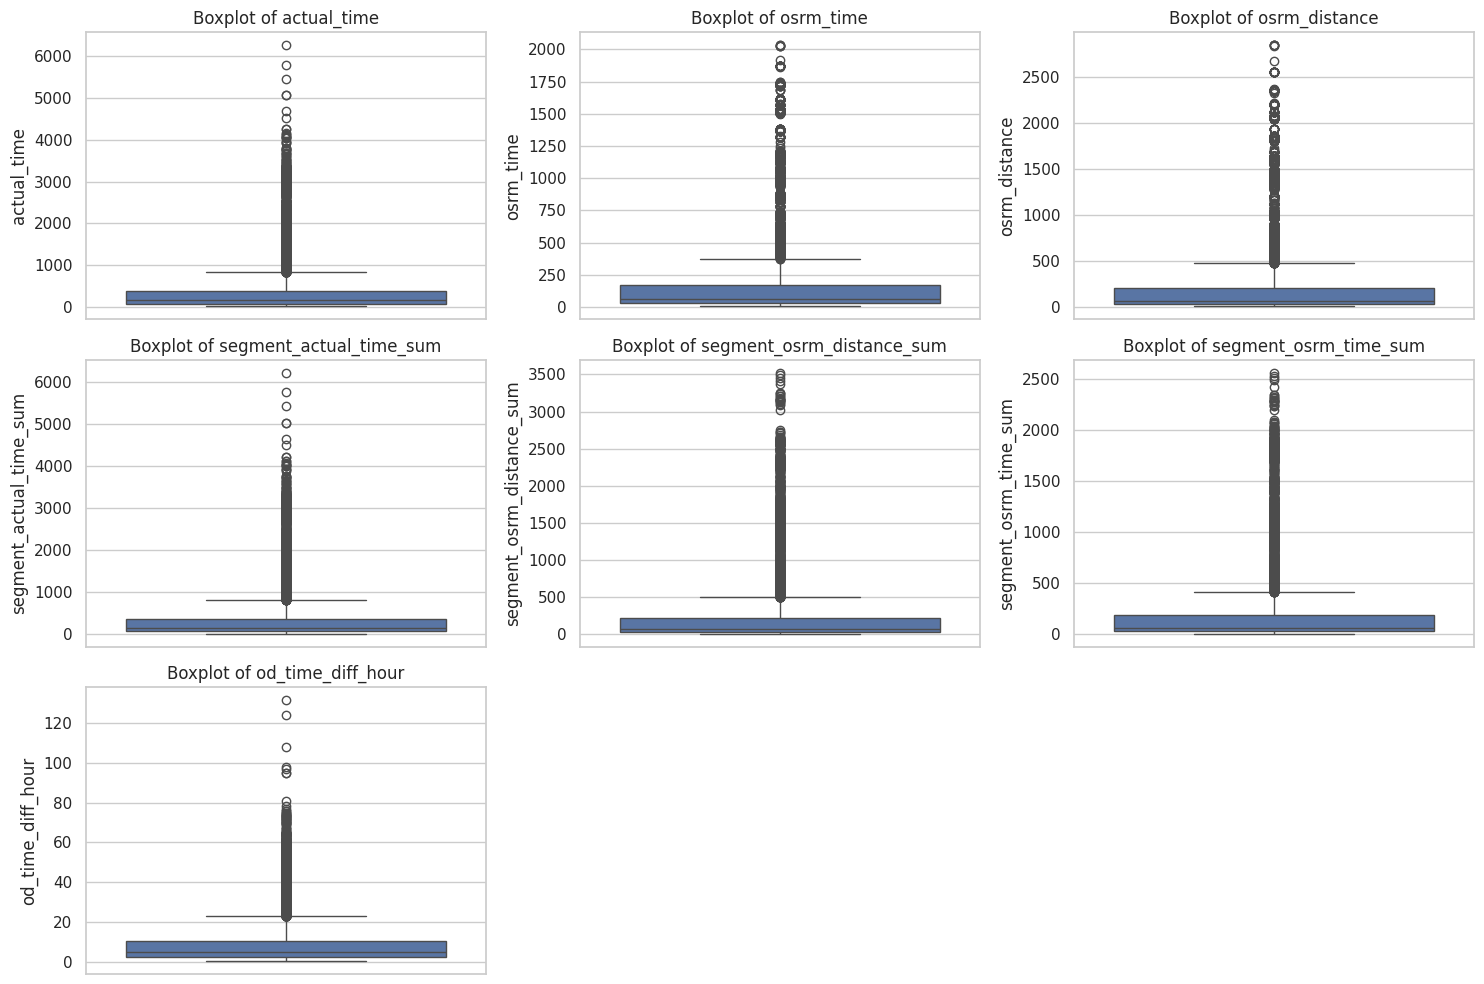

In [136]:
# Select only relevant numerical columns
relevant_num_cols = [
    'actual_time', 'osrm_time', 'osrm_distance',
    'segment_actual_time_sum', 'segment_osrm_distance_sum',
    'segment_osrm_time_sum', 'od_time_diff_hour'
]

# Create boxplots to detect outliers in numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(relevant_num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(trip_aggregated_df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

##### **Inference and Recommendations**

> **Inference**

1. **Presence of Outliers**:
   - The boxplots reveal a significant presence of outliers across various numerical features related to trip data, including:
     - **`actual_time`**: Numerous outliers above the upper whisker, indicating instances of unusually long trips.
     - **`osrm_time`**: Similar patterns, suggesting discrepancies between actual times and OSRM predictions.
     - **`osrm_distance`**: Outliers exist, indicating either errors in distance measurement or atypically long routes.
     - **`segment_actual_time_sum`**, **`segment_osrm_distance_sum`**, **`segment_osrm_time_sum`**: High outlier values may reflect abnormal segment performance or data anomalies.
     - **`od_time_diff_hour`**: Presence of outliers indicates significant variations in delivery times between origin and destination.

> **Recommendations**

1. **Data Cleaning**:
   - **Outlier Treatment**: Apply the IQR method to treat outliers by clipping values beyond the lower and upper bounds. This will help in normalizing the data and making it suitable for analysis and modeling.

2. **Further Analysis**:
   - **Investigate Outliers**: Perform a deeper analysis to understand the reasons behind these outliers. This could involve checking for data entry errors, unusual traffic conditions, or exceptional cases that require special attention.
   - **Segment Analysis**: Analyze segments that contribute to significant outliers. This can help identify persistent issues in certain routes or times.

3. **Modeling Adjustments**:
   - **Robust Models**: Consider using models that are less sensitive to outliers (e.g., tree-based models) for predictive analysis. This will enhance the model's performance and reliability.
   - **Feature Engineering**: Introduce new features that capture trip characteristics, such as time of day, day of the week, or special events, which might help explain variations in actual versus predicted times.

4. **Monitoring**:
   - Implement monitoring mechanisms to regularly check for outliers in real-time data, allowing for timely interventions and corrections.

5. **Stakeholder Communication**:
   - Prepare a report summarizing these findings and recommendations to share with stakeholders to ensure that decision-makers are informed about potential data quality issues and their implications on operational efficiency.


#### **Handle the outliers using the IQR method**

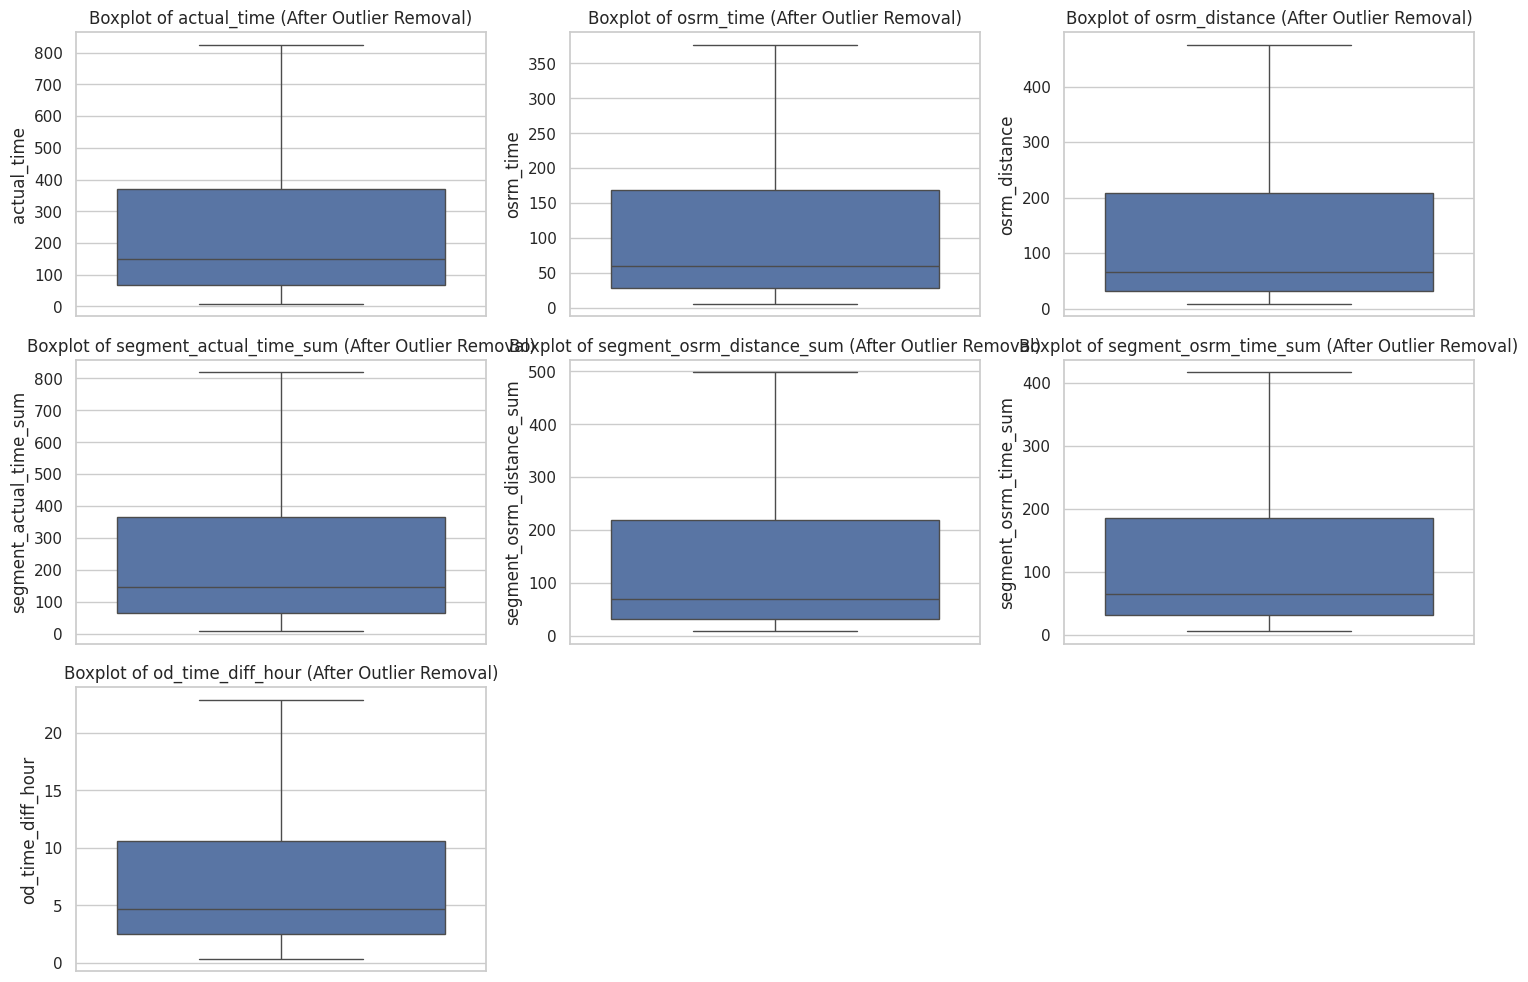

In [137]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, numerical_columns):
    plt.figure(figsize=(15, 10))

    for i, column in enumerate(numerical_columns, 1):
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Calculate lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Clip the column data to the calculated bounds
        df[column] = np.clip(df[column], lower_bound, upper_bound)

        # Plot boxplot after outlier removal
        plt.subplot(3, 3, i)
        sns.boxplot(df[column])
        plt.title(f'Boxplot of {column} (After Outlier Removal)')

    plt.tight_layout()
    plt.show()

    # Return the modified DataFrame
    return df


# Apply outlier removal using IQR to the numerical columns
trip_aggregated_df_cleaned = remove_outliers_iqr(trip_aggregated_df, relevant_num_cols)

## **Perform one-hot encoding on categorical features**

In [138]:
# Display the number of unique values for each categorical column
categorical_columns = ['route_type', 'data', 'source_state', 'source_city', 'source_place', 'source_code', 'destination_city', 'destination_place', 'destination_code', 'destination_state']

# Iterate through each categorical column and display the unique values
for col in categorical_columns:
    unique_values = trip_aggregated_df[col].nunique()
    print(f'Column {col} has {unique_values} unique values')


Column route_type has 2 unique values
Column data has 2 unique values
Column source_state has 29 unique values
Column source_city has 723 unique values
Column source_place has 706 unique values
Column source_code has 48 unique values
Column destination_city has 847 unique values
Column destination_place has 798 unique values
Column destination_code has 47 unique values
Column destination_state has 31 unique values


> **One-Hot Encoding Decisions for Categorical Columns**

We are choosing to apply one-hot encoding only to the `route_type` and `data` columns because:

1. **Low Cardinality**: Both `route_type` and `data` have only 2 unique values. This makes them ideal for one-hot encoding since it will create only one additional binary feature for each column, keeping the dataset manageable and avoiding unnecessary complexity.

2. **Avoiding High Cardinality**: Other columns, like `source_city` and `destination_city`, have a large number of unique values (723 and 847, respectively). Applying one-hot encoding to these columns would drastically increase the number of features, leading to potential overfitting and making the model less efficient.

3. **Model Simplicity**: Focusing on categorical columns with fewer categories ensures that the dataset remains interpretable and efficient to process. Encoding only a few relevant columns minimizes the risk of feature explosion, which can negatively impact model performance.

> **Justification**

By encoding only `route_type` and `data`, we capture necessary categorical information while keeping the dataset size reasonable. Columns with high cardinality, like `source_city` or `destination_city`, are better suited for other encoding methods or left as-is to avoid overcomplicating the model.


In [139]:
# Specify categorical columns for one-hot encoding
categorical_columns = ['route_type', 'data']

# Initialize OneHotEncoder with updated parameter
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the data
encoded_data = encoder.fit_transform(trip_aggregated_df[categorical_columns])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine the original DataFrame with the encoded DataFrame
trip_encoded_df = pd.concat([trip_aggregated_df.drop(categorical_columns, axis=1), encoded_df], axis=1)

trip_encoded_df.sample(10)

,trip_uuid,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,source_state,source_city,source_place,source_code,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_weekday,destination_city,destination_place,destination_code,destination_state,route_type_FTL,data_training
4043,trip-153720824739314702,824.5,225.0,316.069214,818.5,316.113586,225.0,19.59,West Bengal,Kolkata,Dankuni,HB,2018,9,17,0,Kolkata,Dankuni,HB,West Bengal,1.0,1.0
2507,trip-153699688432031984,119.0,29.0,28.309299,118.0,28.309200,28.0,4.31,West Bengal,Kolkata,Dankuni,HB,2018,9,15,5,Kolkata,TrtllaRD,L,West Bengal,0.0,1.0
14251,trip-153853197892701460,93.0,36.0,46.735001,92.0,50.532600,48.0,3.96,Tamil Nadu,MAA,Poonamallee,HB,2018,10,3,2,Chennai,Madhavaram,L,Tamil Nadu,0.0,0.0
2819,trip-153704381554167693,824.5,184.0,256.823914,818.5,261.156189,183.0,20.68,Bihar,Muzaffrpur,Bbganj,I,2018,9,15,5,Muzaffrpur,Bbganj,I,Bihar,1.0,1.0
14591,trip-153859444381437975,30.0,18.0,19.684200,29.0,19.684200,17.0,3.62,Maharashtra,Mumbai,CottonGreen,DPC,2018,10,3,2,Mumbai Hub,NaN,NaN,Maharashtra,0.0,0.0
6349,trip-153747525017999230,61.0,22.0,19.040100,61.0,19.040100,22.0,1.96,Delhi,Del,Okhla,PC,2018,9,20,3,GZB,Mohan,Nagar_DPC,Uttar Pradesh,0.0,1.0
8789,trip-153777260945046616,60.0,17.0,19.345699,60.0,19.345699,17.0,1.35,Rajasthan,Jaipur,Central,I_7,2018,9,24,0,Jaipur,NgrNigam,DC,Rajasthan,0.0,1.0
1412,trip-153687867104119242,298.0,124.0,150.716507,292.0,160.546997,128.0,8.35,Tamil Nadu,Chennai,Chrompet,DPC,2018,9,13,3,Chennai,Chrompet,DPC,Tamil Nadu,0.0,1.0
13367,trip-153841273203772120,206.0,87.0,119.874199,206.0,117.045601,88.0,6.20,Jharkhand,Ranchi,Hub,NaN,2018,10,1,0,Jamshedpur,Central,I_3,Jharkhand,1.0,0.0
1987,trip-153695477103483262,466.0,145.0,169.937607,465.0,156.711197,144.0,15.06,Andhra Pradesh,Vijayawada,Rynapadu,H,2018,9,14,4,Kaikaluru,Atapaka,D,Andhra Pradesh,1.0,1.0


## **Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler**

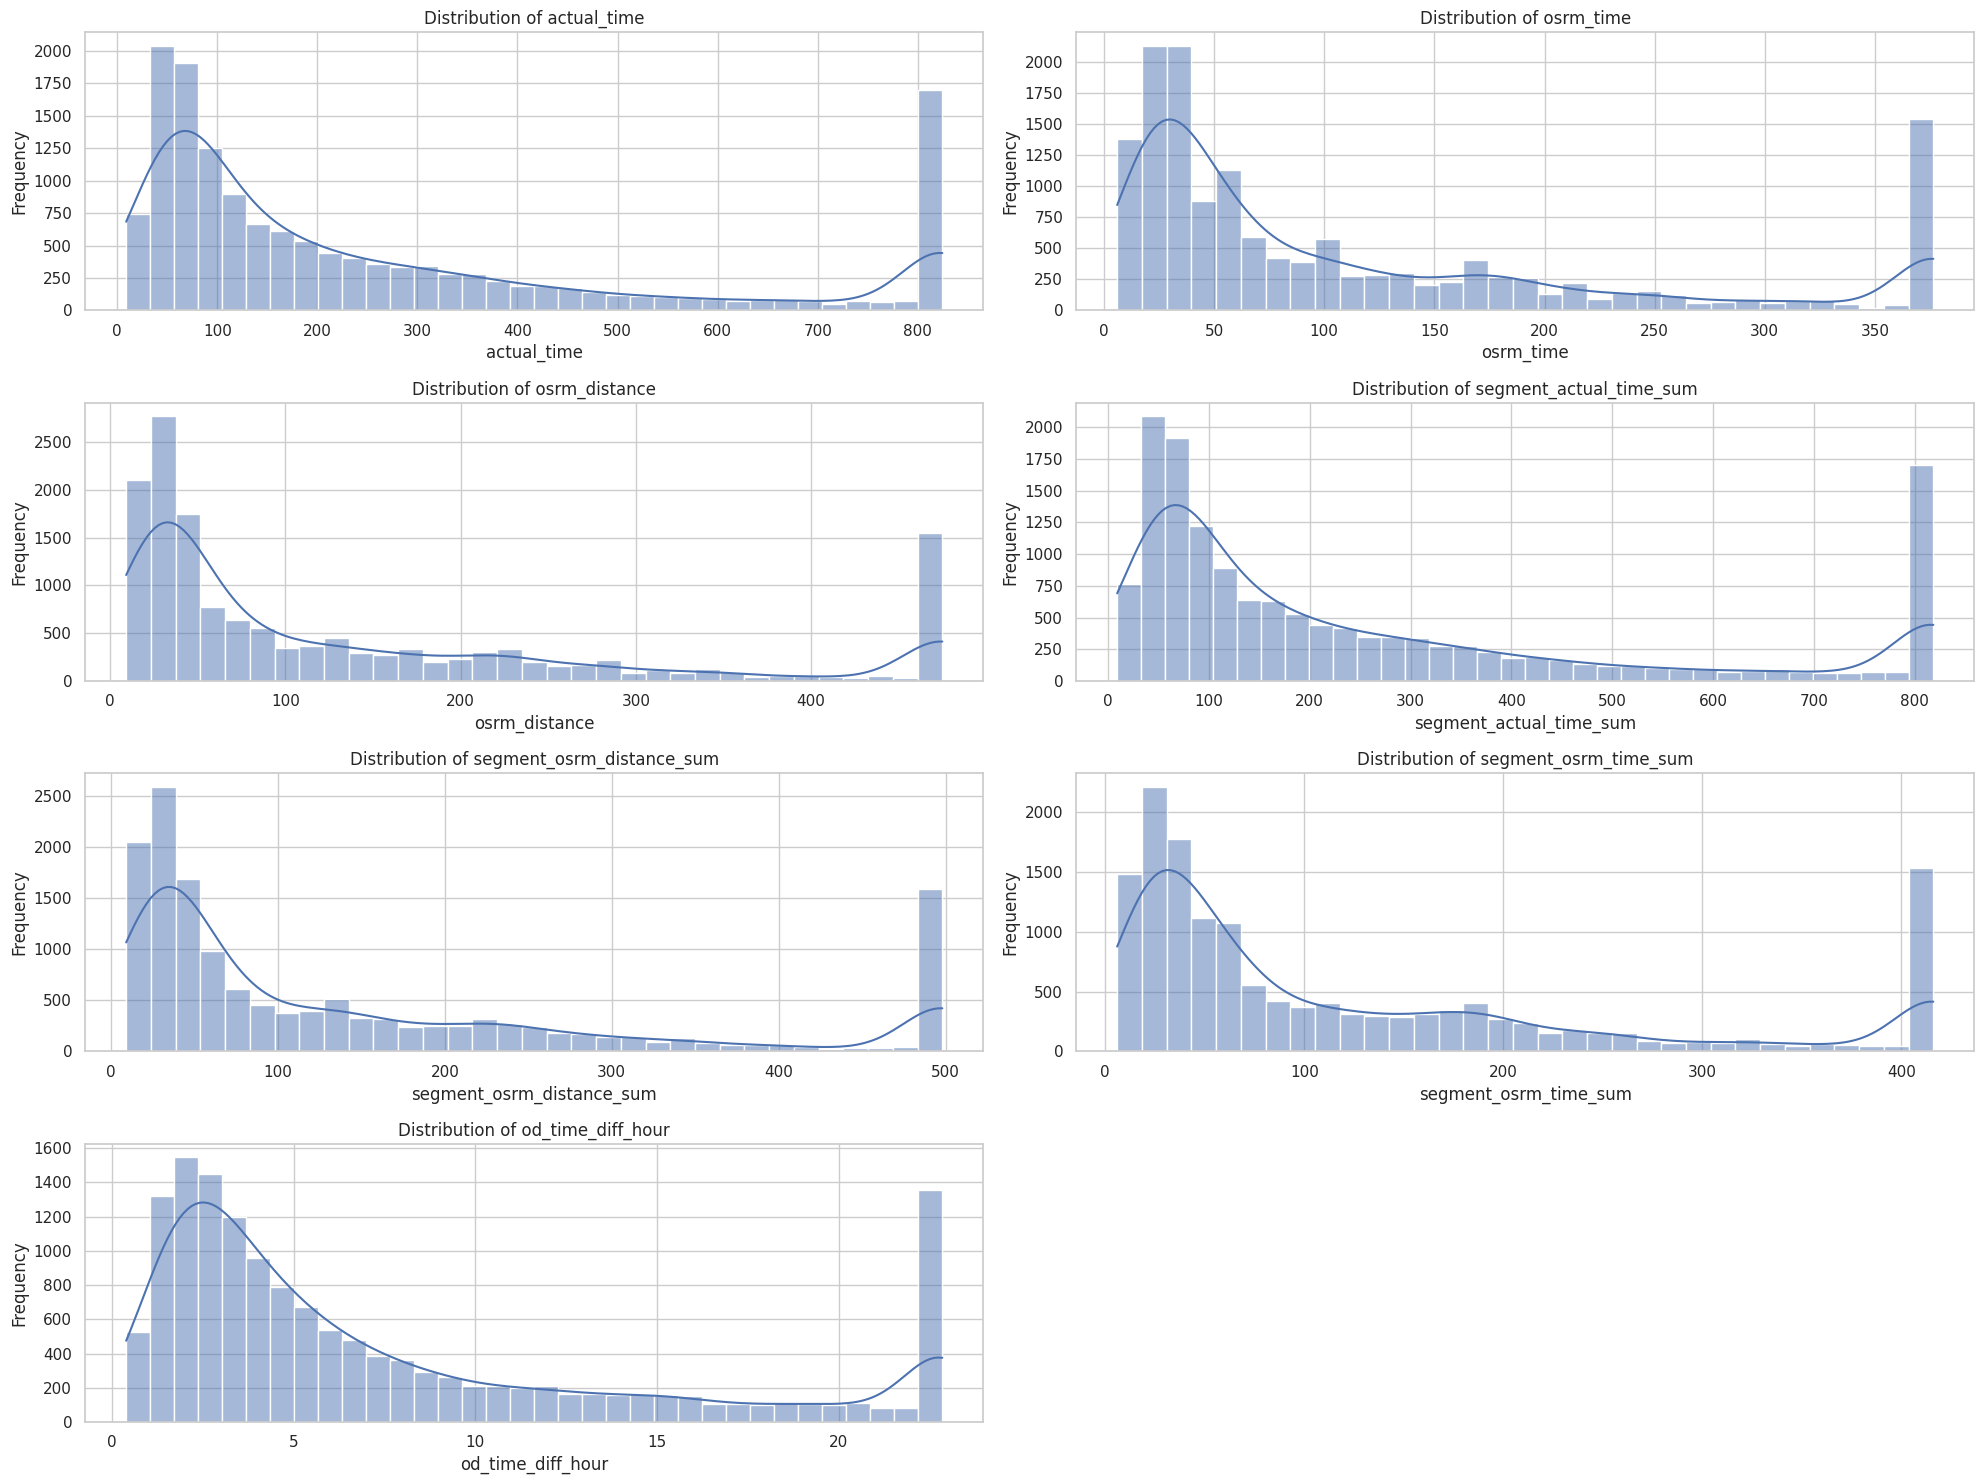

In [140]:
# Set the plot size for better visibility
plt.figure(figsize=(20, 15))

# Loop through each numerical column and create histograms
for i, column in enumerate(relevant_num_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(trip_aggregated_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Inference from the Visualizations**

Based on the histograms for the numerical features, here’s what we can infer:

1. **Most of the features have a right-skewed distribution (positive skewness)**:
   - The majority of the values are concentrated towards the lower end, and there are some extreme higher values.
   - This is common in time and distance-related data, where most trips may be short, but there are some longer ones that create skewness.

2. **Outliers are visible in several features**:
   - Features such as `actual_time`, `segment_actual_time_sum`, and `od_time_diff_hour` display values at the far right, indicating the presence of outliers or rare events with significantly higher values.

> **Scaling Decision**

- **StandardScaler** works well for data with a normal or near-normal distribution, as it centers the data by subtracting the mean and dividing by the standard deviation. However, this data is **not normally distributed** (it’s skewed), which might affect the standardization process.
  
- **MinMaxScaler** rescales the data into a [0, 1] range by adjusting values based on the minimum and maximum values of each feature. This is suitable for **skewed data** as it preserves the distribution of the data while bringing all features to a common scale.

> **Conclusion**

Given the skewness in the data and the presence of outliers, **MinMaxScaler** is likely the better option here. It will scale the data without assuming a normal distribution and help in maintaining the relationships between data points, especially since the values are spread over a wide range.

Next, we will apply **MinMaxScaler** to these features.


### **Applying MinMaxScaler**

In [141]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the relevant numerical columns
trip_aggregated_df[relevant_num_cols] = scaler.fit_transform(trip_aggregated_df[relevant_num_cols])

# Display the scaled DataFrame to verify changes
trip_aggregated_df[relevant_num_cols].head(10)

,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.164316,0.167341,0.163212,0.163064,0.153628,0.143902,0.117542
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.061312,0.024291,0.022768,0.061767,0.022096,0.024390,0.056990
4,0.407112,0.299595,0.295607,0.408894,0.281662,0.265854,0.515583
5,0.063765,0.045884,0.040765,0.063002,0.038842,0.041463,0.123776
6,0.018394,0.018893,0.006322,0.018530,0.006024,0.017073,0.055209
7,0.067443,0.075574,0.042601,0.067943,0.040592,0.068293,0.091273
8,0.186389,0.062078,0.046928,0.187770,0.044714,0.056098,0.191006
9,0.017167,0.005398,0.001897,0.017295,0.014343,0.019512,0.019145


# **Hypothesis Testing and Visualization**

## **Perform hypothesis testing / visual analysis between : actual_time aggregated value and OSRM time aggregated value**

> <font color='blue'>**Visualization**</font>

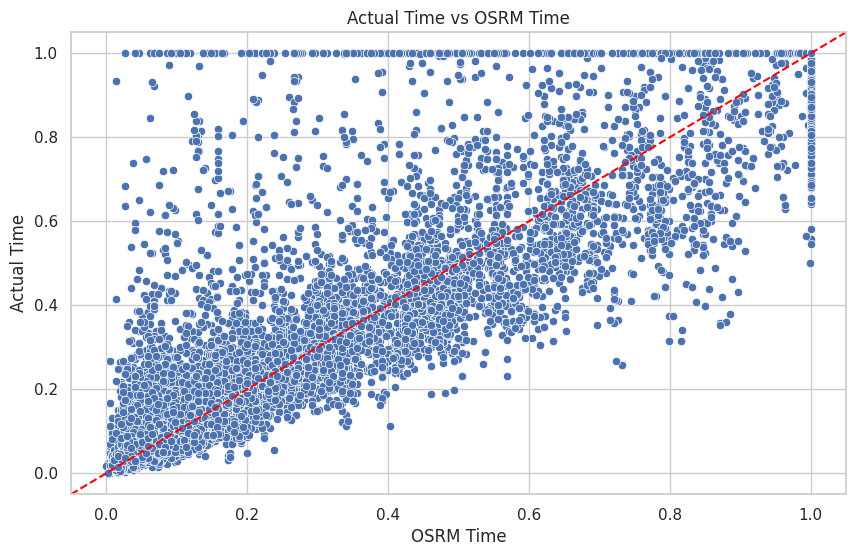

In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=trip_aggregated_df['osrm_time'], y=trip_aggregated_df['actual_time'])
plt.title('Actual Time vs OSRM Time')
plt.xlabel('OSRM Time')
plt.ylabel('Actual Time')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # line of equality
plt.show()


> <font color='blue'>**Formulate Null Hypothesis ($H_0$) and
Alternate Hypothesis ($H_a$)**</font>

- **Null Hypothesis ($H_0$):** There is no significant difference between the aggregated values of `actual_time` and `osrm_time`.
  - $\mu_1 = \mu_2$

- **Alternate Hypothesis ($H_a$):** There is a significant difference between the aggregated values of `actual_time` and `osrm_time`.
  - $\mu_1 \neq \mu_2$


> <font color='blue'>**Perform Two-Tailed Paired T-Test**</font>

In [143]:
# Extract the relevant data
actual_time = trip_aggregated_df['actual_time']
osrm_time = trip_aggregated_df['osrm_time']

# Perform the paired T-Test
t_stat, p_value = stats.ttest_rel(actual_time, osrm_time)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual_time and osrm_time.")

T-statistic: 17.642116164967693
P-value: 5.926381739886476e-69
Reject the null hypothesis: There is a significant difference between actual_time and osrm_time.


### **Inferences and Recommendations**

> **Inferences :**

- **Correlation Analysis**: The scatter plot of `Actual Time` versus `OSRM Time` indicates a strong positive correlation, suggesting that higher OSRM time predictions generally align with increased actual delivery times. However, notable deviations from the red dashed line indicate that while OSRM provides a good estimate, there are cases where actual delivery times are significantly longer.

- **Hypothesis Testing Results**: The results from the t-test (T-statistic: 17.64, P-value: 5.93e-69) led us to reject the null hypothesis. This indicates a statistically significant difference between the aggregated values of `Actual Time` and `OSRM Time`, confirming that OSRM time does not perfectly predict actual delivery times.

> **Recommendations :**

- **Enhance the OSRM Model**: To improve the accuracy of time predictions, it is recommended to enhance the OSRM model by incorporating real-time traffic conditions, roadwork, and other factors that may affect delivery times. This will help to close the gap between estimated and actual delivery times.

- **Investigation of Outliers**: Focus on investigating the cases where actual delivery times substantially exceed OSRM predictions. Analyzing these outliers could reveal critical insights into delivery inefficiencies and inform targeted operational improvements.

- **Continuous Monitoring**: Establish a system for continuous monitoring and feedback that compares actual delivery times against OSRM estimates. This will aid in adjusting the routing algorithm and operational strategies based on real-world performance.

- **Driver Training and Resources**: Consider providing training for drivers based on the analysis of delivery times to optimize routes and improve delivery efficiency. Resources could also be allocated for managing known high-traffic areas or challenging delivery routes.

By integrating these insights from both the visualization and hypothesis testing, we can make informed decisions to refine our delivery operations and enhance overall efficiency.


## **Perform hypothesis testing / visual analysis between : actual_time aggregated value and segment actual time aggregated value**

> <font color='blue'>**Visualization**</font>

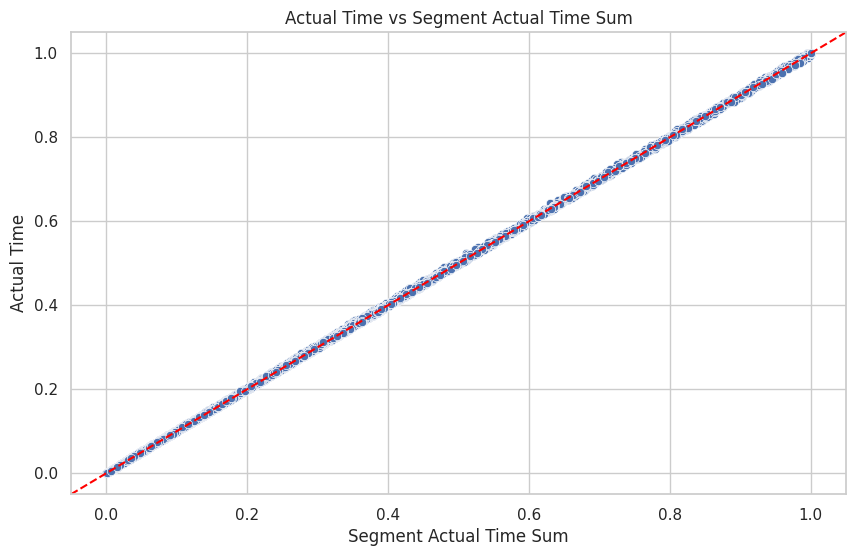

In [144]:
# Scatter plot for Actual Time vs Segment Actual Time Sum
plt.figure(figsize=(10, 6))
sns.scatterplot(x=trip_aggregated_df['segment_actual_time_sum'], y=trip_aggregated_df['actual_time'])
plt.title('Actual Time vs Segment Actual Time Sum')
plt.xlabel('Segment Actual Time Sum')
plt.ylabel('Actual Time')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # line of equality for reference
plt.show()

>

> <font color='blue'>**Formulate Null Hypothesis ($H_0$) and
Alternate Hypothesis ($H_a$)**</font>

- **Null Hypothesis ($H_0$):** There is no significant difference between the aggregated values of `actual_time` and `segment_actual_time_sum`.
  - $\mu_1 = \mu_2$
  
- **Alternate Hypothesis ($H_a$):** There is a significant difference between the aggregated values of `actual_time` and `segment_actual_time_sum`.
  - $\mu_1 \neq \mu_2$

> <font color='blue'>**Perform Two-Tailed Paired T-Test**</font>

In [145]:
# Extract the relevant data
actual_time = trip_aggregated_df['actual_time']
segment_actual_time_sum = trip_aggregated_df['segment_actual_time_sum']

# Perform the Paired T-Test
t_stat, p_value = ttest_rel(actual_time, segment_actual_time_sum)

# Display the results
print(f'Paired T-Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time_sum.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between actual_time and segment_actual_time_sum.")

Paired T-Test Statistic: 35.88119767294989
P-value: 1.9157984150732608e-270
Reject the null hypothesis: There is a significant difference between actual_time and segment_actual_time_sum.


### **Inferences and Recommendations**

> **Inferences:**

- **Correlation Analysis**: The scatter plot of `Actual Time` versus `Segment Actual Time Sum` reveals an almost perfect linear relationship. The points closely align with the red dashed line, indicating that the sum of the actual times for the segments is a very accurate representation of the overall actual delivery time.

- **Hypothesis Testing Results**: The paired t-test results (T-statistic: 35.88, P-value: 1.92e-270) led us to reject the null hypothesis. This suggests there is a statistically significant difference between the aggregated values of `Actual Time` and `Segment Actual Time Sum`. However, the strong correlation indicated by the visualization suggests that the differences may be negligible in practical terms.

> **Recommendations:**

- **Utilize Segment Times for Forecasting**: Given the close alignment between `Segment Actual Time Sum` and `Actual Time`, it is recommended to utilize segment times for forecasting purposes. This approach may simplify data processing and enhance efficiency while maintaining accuracy.

- **Continuous Validation of Segment Times**: Implement a system to continuously validate the accuracy of `Segment Actual Time Sum` against `Actual Time` for various routes. This will ensure that any deviations are identified and addressed promptly.

- **Optimization of Delivery Operations**: Analyze the few cases where there are significant discrepancies between `Actual Time` and `Segment Actual Time Sum` to identify underlying factors such as unexpected delays or route inefficiencies. This can inform strategies for operational optimization.

- **Data-Driven Decision Making**: Encourage a data-driven approach within the delivery teams, utilizing insights from both actual delivery times and segment analyses to refine routing algorithms and improve overall delivery performance.

By combining the insights from visualization and hypothesis testing, these recommendations aim to optimize delivery operations and enhance overall efficiency.


## **Perform hypothesis testing / visual analysis between : OSRM distance aggregated value and segment OSRM distance aggregated value**

> <font color='blue'>**Visualization**</font>

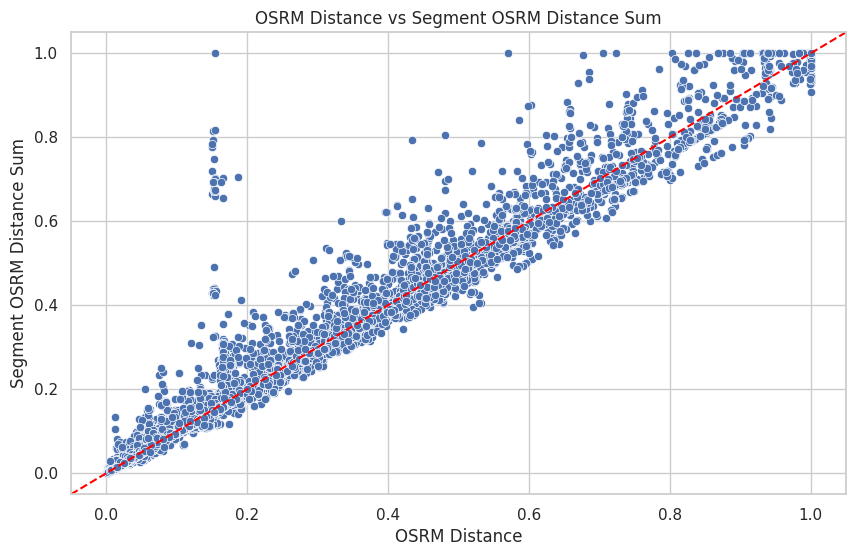

In [146]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=trip_aggregated_df['osrm_distance'], y=trip_aggregated_df['segment_osrm_distance_sum'])
plt.title('OSRM Distance vs Segment OSRM Distance Sum')
plt.xlabel('OSRM Distance')
plt.ylabel('Segment OSRM Distance Sum')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # line of equality
plt.show()

> <font color='blue'>**Formulate Null Hypothesis ($H_0$) and Alternate Hypothesis ($H_a$)**</font>

- **Null Hypothesis ($H_0$):** There is no significant difference between the aggregated values of `OSRM distance` and `Segment OSRM distance`.
  - $\mu_1 = \mu_2$

- **Alternate Hypothesis ($H_a$):** There is a significant difference between the aggregated values of `OSRM distance` and `Segment OSRM distance`.
  - $\mu_1 \neq \mu_2$

> <font color='blue'>**Perform Two-Tailed Paired T-Test**</font>

In [147]:
# Extract the relevant data
osrm_distance = trip_aggregated_df['osrm_distance']
segment_osrm_distance_sum = trip_aggregated_df['segment_osrm_distance_sum']

# Perform the Paired T-Test
t_stat, p_value = ttest_rel(osrm_distance, segment_osrm_distance_sum)

# Display the results
print(f'Paired T-Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between OSRM distance and segment OSRM distance.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between OSRM distance and segment OSRM distance.")


Paired T-Test Statistic: -12.732311543606473
P-value: 6.1068995691694225e-37
Reject the null hypothesis: There is a significant difference between OSRM distance and segment OSRM distance.


### **Inferences and Recommendations**

> **Inferences :**

- **Correlation Analysis**: The scatter plot of `OSRM Distance` versus `Segment OSRM Distance Sum` indicates a strong positive correlation, suggesting that higher OSRM distances align closely with the segment distances. The points are tightly clustered around the red dashed line, which represents the line of equality, indicating that segment distances are generally good predictors of OSRM distances.

- **Hypothesis Testing Results**: The results from the paired t-test (T-statistic: -12.73, P-value: 6.11e-37) led us to reject the null hypothesis. This indicates a statistically significant difference between the aggregated values of `OSRM Distance` and `Segment OSRM Distance Sum`, confirming that these two measures do not perfectly match.

> **Recommendations :**

- **Refinement of the OSRM Model**: To enhance the accuracy of OSRM distance predictions, consider refining the OSRM model to account for real-world variations such as road conditions, traffic patterns, and rerouting scenarios that may not be reflected in the segment distances.

- **Investigate Discrepancies**: Conduct further analysis on instances where significant discrepancies exist between OSRM distances and segment distances. Understanding the underlying causes of these discrepancies can lead to actionable insights for improving routing accuracy.

- **Continuous Monitoring**: Implement a feedback loop to continuously monitor the performance of OSRM distance estimates against actual segment distances. This will help refine the model over time and adjust for any systematic biases in the distance predictions.

- **Training for Route Optimization**: Provide training for routing and logistics teams based on insights gained from the analysis. This could include best practices for using OSRM data to inform decision-making and improve overall operational efficiency.

By integrating these insights from both the visualization and hypothesis testing, we can make informed decisions to optimize routing operations and enhance efficiency in the delivery process.


## **Perform hypothesis testing / visual analysis between : OSRM time aggregated value and segment OSRM time aggregated value**

> <font color='blue'>**Visualization**</font>

In [148]:
# Extract the relevant data
osrm_time = trip_aggregated_df['osrm_time']
segment_osrm_time_sum = trip_aggregated_df['segment_osrm_time_sum']

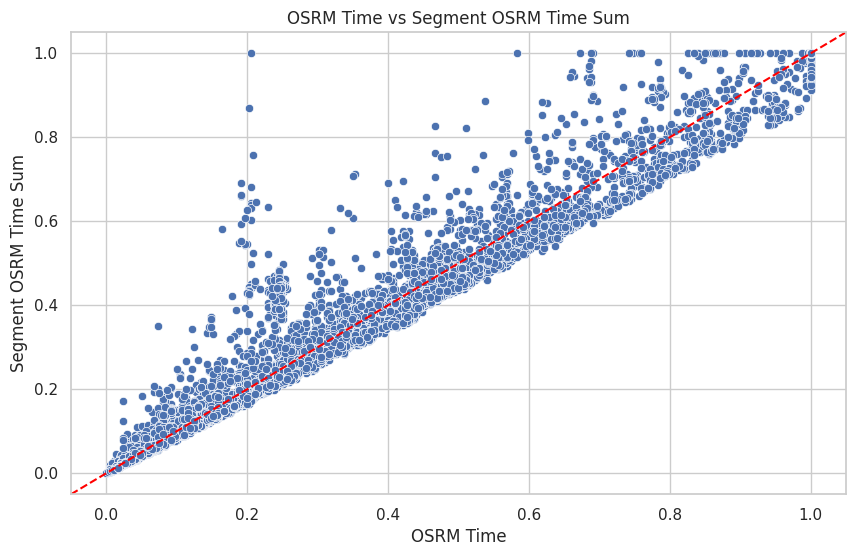

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=osrm_time, y=segment_osrm_time_sum)
plt.title('OSRM Time vs Segment OSRM Time Sum')
plt.xlabel('OSRM Time')
plt.ylabel('Segment OSRM Time Sum')
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # line of equality
plt.show()

> <font color='blue'>**Formulate Null Hypothesis ($H_0$) and
Alternate Hypothesis ($H_a$)**</font>

- **Null Hypothesis ($H_0$):** There is no significant difference between the aggregated values of `OSRM time` and `Segment OSRM time`.
  - $\mu_1 = \mu_2$

- **Alternate Hypothesis ($H_a$):** There is a significant difference between the aggregated values of `OSRM time` and `Segment OSRM time`.
  - $\mu_1 \neq \mu_2$

> <font color='blue'>**Perform Two-Tailed Paired T-Test**</font>

In [150]:
# Perform the Paired T-Test
t_stat, p_value = ttest_rel(osrm_time, segment_osrm_time_sum)

# Display the results
print(f'Paired T-Test Statistic: {t_stat}')
print(f'P-value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between OSRM time and segment OSRM time sum.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between OSRM time and segment OSRM time sum.")


Paired T-Test Statistic: 2.3538062425600677
P-value: 0.018595280668980148
Reject the null hypothesis: There is a significant difference between OSRM time and segment OSRM time sum.


### **Inferences and Recommendations**

> **Inferences :**

- **Correlation Analysis:** The scatter plot of `OSRM Time` versus `Segment OSRM Time Sum` shows a strong positive correlation. The points closely align with the red dashed line, indicating that the predicted OSRM time generally matches the aggregated segment OSRM time. However, there are some discrepancies where the segment times exceed the OSRM predictions, suggesting variability in performance.

- **Hypothesis Testing Results:** The results from the paired t-test (T-statistic: 2.35, P-value: 0.0186) lead us to reject the null hypothesis. This indicates a statistically significant difference between the aggregated values of `OSRM Time` and `Segment OSRM Time Sum`, confirming that the two measurements do not perfectly align.

> **Recommendations :**

- **Refine OSRM Model Inputs:** To enhance the accuracy of OSRM time predictions, it is advisable to refine the model by incorporating additional real-time data such as traffic congestion, road closures, and historical delivery performance. This could help in producing more accurate time estimates.

- **Focus on High Discrepancy Cases:** Investigate specific cases where the segment OSRM times significantly exceed OSRM predictions. Analyzing these instances can provide insights into factors affecting delivery efficiency, potentially leading to improvements in route planning.

- **Implement Feedback Mechanisms:** Establish a continuous feedback system to monitor discrepancies between OSRM predictions and actual delivery performance. This ongoing analysis will support adaptive improvements to routing algorithms based on real-world outcomes.

- **Driver Training Initiatives:** Offer targeted training for drivers that emphasizes understanding OSRM predictions and optimizing delivery routes. This can help drivers manage their time better and align closer with OSRM estimates, leading to improved operational efficiency.

By leveraging insights from the visualization and hypothesis testing, we can make data-driven decisions to optimize delivery processes and enhance overall operational performance.


# **Some Business Insights**

### **Top and Least common source-destination corridors**

In [151]:
# Define a function to extract the corridor code
def extract_corridor_code(segment_key):
    # Split the segment_key by underscore and return the desired corridor code
    parts = segment_key.split('_')
    return f"{parts[1]}_{parts[2]}"  # Combine the two parts to form the corridor code

# Apply the function to the segment_key column to create a new column 'corridor_code'
segment_aggregated_df['corridor_code'] = segment_aggregated_df['segment_key'].apply(extract_corridor_code)

# Display the updated DataFrame with the new 'corridor_code' column
segment_aggregated_df['corridor_code'].head()


,corridor_code
0,IND209304AAA_IND000000ACB
1,IND462022AAA_IND209304AAA
2,IND561203AAB_IND562101AAA
3,IND572101AAA_IND561203AAB
4,IND000000ACB_IND160002AAC


In [152]:
# Count the occurrences of each corridor code
corridor_counts = segment_aggregated_df['corridor_code'].value_counts().reset_index()
corridor_counts.columns = ['corridor_code', 'trip_count']

# Get the top 10 common corridors
top_corridors = corridor_counts.head(15)

# Get the least 10 common corridors
least_corridors = corridor_counts.tail(15)

# Combine top and least corridors into a single DataFrame
combined_corridors = pd.concat([top_corridors, least_corridors], axis=0)

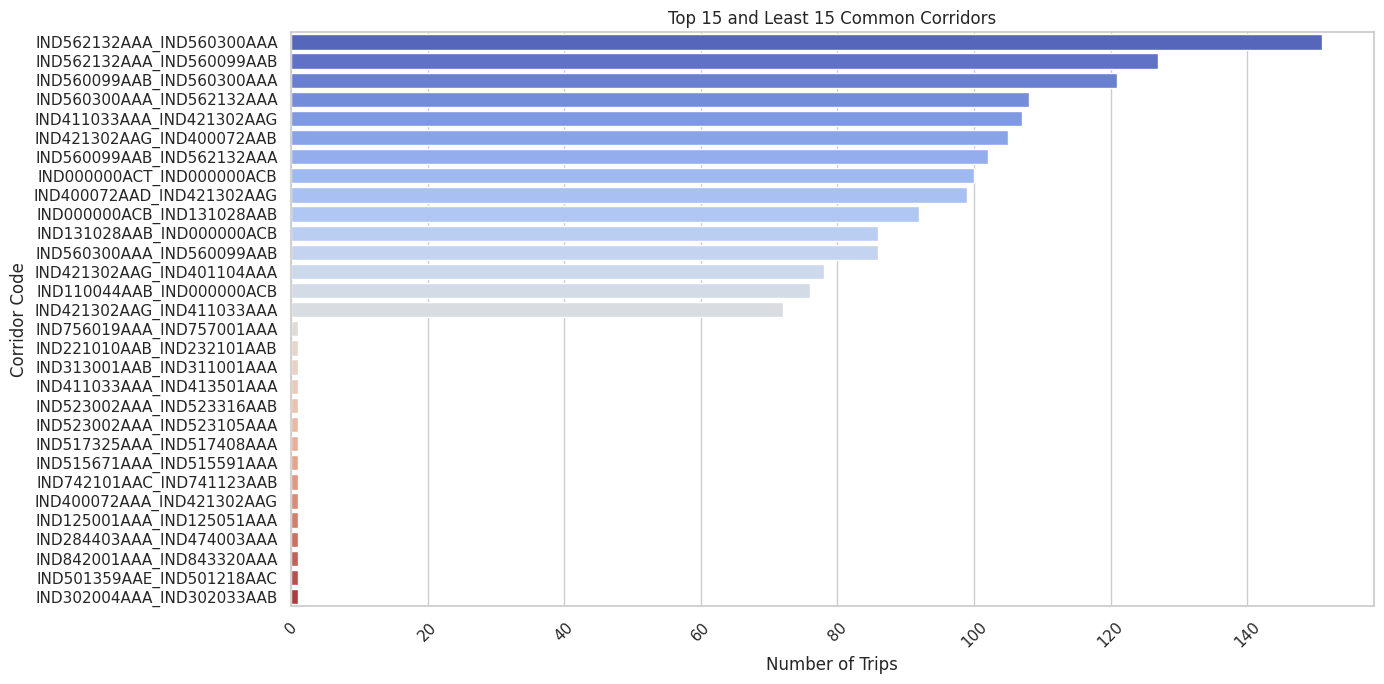

In [153]:
# Set the figure size
plt.figure(figsize=(14, 7))

# Create a bar plot for the combined corridors
sns.barplot(data=combined_corridors, x='trip_count', y='corridor_code', palette='coolwarm')

# Set title and labels
plt.title('Top 15 and Least 15 Common Corridors')
plt.xlabel('Number of Trips')
plt.ylabel('Corridor Code')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### **Inferences and Recommendations**

> **Inferences :**  

- **Corridor Frequency Distribution:** The chart shows the top 15 and least 15 common corridors in terms of the number of trips. The most frequent corridor is between `IND562132AAA` and `IND560300AAA`, with over 140 trips, followed by the corridor `IND562132AAA` to `IND560099AAB`. This indicates that certain corridors have a higher volume of traffic compared to others.
- **Traffic Concentration:** A few corridors (such as those starting from `IND562132AAA` and `IND560300AAA`) handle a significant portion of the delivery load, while the least common corridors have under 20 trips, indicating sparse usage.
- **Efficiency and Optimization Potential:** The frequency of trips along certain corridors suggests these are critical routes in the logistics network. These frequent routes could be optimized further in terms of time, distance, and cost savings.

> **Recommendations :**

- **Route Optimization for High-Frequency Corridors:** Since the top corridors handle a substantial amount of traffic, focusing on optimizing these routes with real-time data (e.g., traffic patterns, alternative paths) can significantly improve delivery time and reduce costs.
- **Strategic Focus on Low-Frequency Corridors:** For the least common corridors, Delhivery should analyze whether these routes are necessary or if they can be consolidated to improve operational efficiency.
- **Capacity Management:** Implement dynamic capacity management on the busiest corridors to avoid overloading and ensure smoother delivery operations during peak times.
- **Expand Infrastructure in Critical Corridors:** Based on the high traffic along specific routes, Delhivery might benefit from investing in better infrastructure, such as additional warehouses or distribution centers, along these key corridors to improve delivery speed and efficiency.


### **The busiest routes or locations based on trip frequency and time.**

In [154]:
# Calculate trip frequency and average time for each corridor
route_stats = (segment_aggregated_df
               .groupby('corridor_code')  # Group by the corridor code
               .agg(trip_count=('segment_key', 'count'),  # Count the number of trips for each corridor
                    average_time=('actual_time', 'mean'))  # Calculate the average actual time for each corridor
               .reset_index())  # Reset the index to turn the grouped data back into a DataFrame

# Sort by trip_count to find the busiest routes
route_stats = route_stats.sort_values(by='trip_count', ascending=False)  # Sort the DataFrame in descending order based on trip count

# Get the top 10 busiest routes
top_busiest_routes = route_stats.head(10)  # Retrieve the top 10 busiest routes based on trip count

top_busiest_routes

,corridor_code,trip_count,average_time
1775,IND562132AAA_IND560300AAA,151,87.874172
1774,IND562132AAA_IND560099AAB,127,91.850394
1719,IND560099AAB_IND560300AAA,121,114.661157
1735,IND560300AAA_IND562132AAA,108,105.231481
1080,IND411033AAA_IND421302AAG,107,218.766355
1152,IND421302AAG_IND400072AAB,105,61.285714
1720,IND560099AAB_IND562132AAA,102,97.137255
68,IND000000ACT_IND000000ACB,100,69.880000
1010,IND400072AAD_IND421302AAG,99,80.868687
38,IND000000ACB_IND131028AAB,92,216.456522


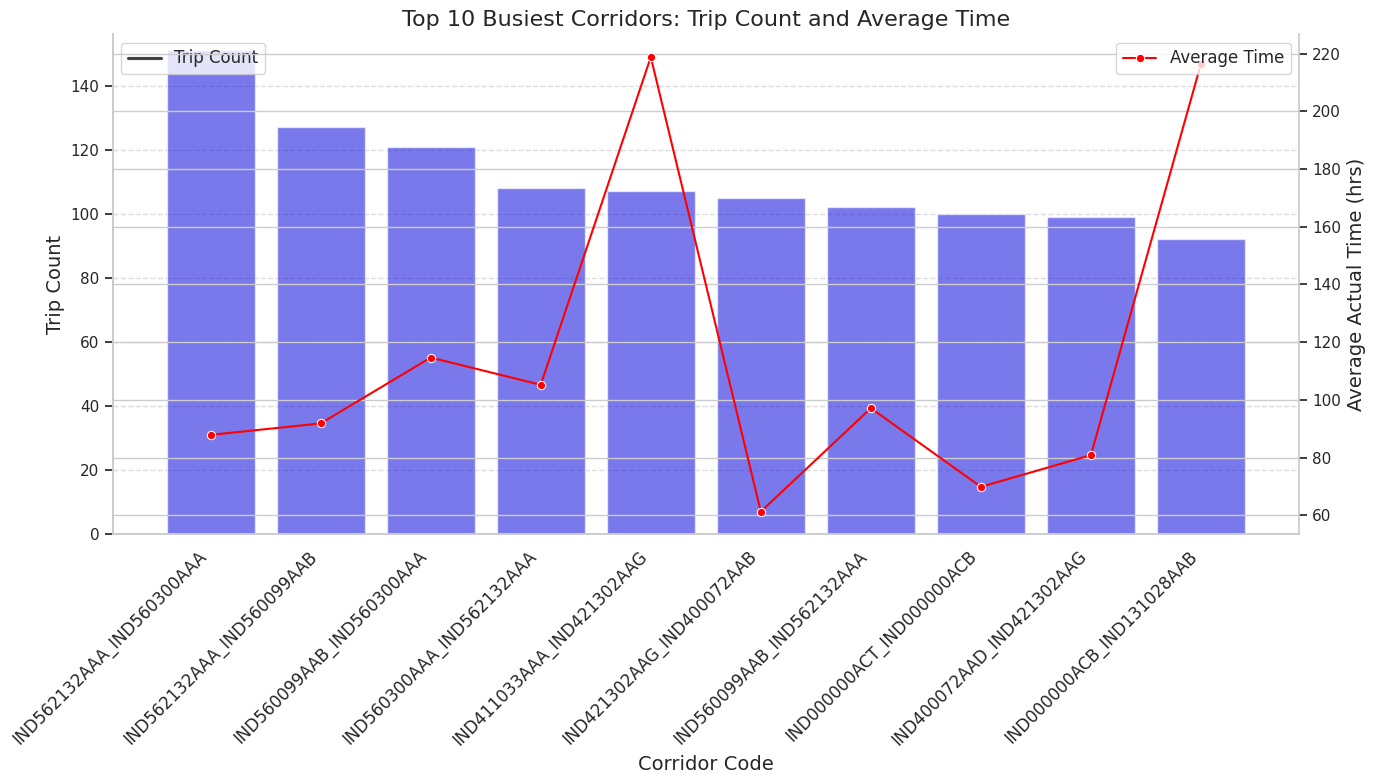

In [155]:
# Create a figure with subplots
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a bar plot for trip count
sns.barplot(data=top_busiest_routes, x='corridor_code', y='trip_count', color='blue', alpha=0.6, ax=ax1)

# Set titles and labels
ax1.set_title('Top 10 Busiest Corridors: Trip Count and Average Time', fontsize=16)
ax1.set_ylabel('Trip Count', fontsize=14)
ax1.set_xlabel('Corridor Code', fontsize=14)

# Rotate x-axis labels for better visibility
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=12)

# Create a secondary y-axis for average time
ax2 = ax1.twinx()
sns.lineplot(data=top_busiest_routes, x='corridor_code', y='average_time', color='red', marker='o', ax=ax2)

# Set secondary y-axis label
ax2.set_ylabel('Average Actual Time (hrs)', fontsize=14)

# Hide spines to reduce clutter
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Adjust the grid and ticks
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(0, top_busiest_routes['trip_count'].max() + 5)  # Slightly higher limit for better visuals

# Show legends
ax1.legend(['Trip Count'], loc='upper left', fontsize=12)
ax2.legend(['Average Time'], loc='upper right', fontsize=12)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

#### **Inferences and Recommendations**

> **Inferences :**  

- **Trip Count vs. Average Time Analysis:** The chart compares the top 10 busiest corridors in terms of trip count and the average actual time taken (in hours). The corridor `IND421302AAG_IND400072AAB` has the highest average time of around 220 hours despite having a moderate trip count, which suggests inefficiencies in delivery for this corridor.
- **Discrepancy in Time and Volume:** Certain corridors, such as `IND000000ACT_IND000000ACB`, show relatively low trip counts but still have longer average times, indicating potential delays or challenges in these routes. On the other hand, corridors like `IND562132AAA_IND560300AAA` have the highest trip counts but a relatively moderate average time, implying efficient operations on those routes.
- **Outliers in Delivery Time:** The spike in average time for some corridors, particularly those with lower trip counts, may indicate operational inefficiencies, such as traffic congestion, poor infrastructure, or other bottlenecks affecting delivery times.

> **Recommendations :**

- **Focus on High Average Time Corridors:** Delhivery should prioritize investigating corridors like `IND421302AAG_IND400072AAB` and `IND000000ACT_IND000000ACB`, where the average delivery time is disproportionately high. Addressing issues on these routes may significantly reduce overall delivery times.
- **Optimize Frequent but Efficient Corridors:** The corridor `IND562132AAA_IND560300AAA` demonstrates a high volume of trips with relatively efficient delivery times. Delhivery can use this as a model corridor for optimizing similar routes by replicating the strategies that work here.
- **Conduct Root Cause Analysis on Outliers:** For corridors with high average delivery times despite low trip counts, Delhivery should conduct a root cause analysis to identify specific factors (e.g., road conditions, driver availability, or package handling delays) contributing to inefficiencies.
- **Dynamic Route Planning:** Implement dynamic route adjustments for corridors with fluctuating delivery times. Real-time data such as traffic updates, weather conditions, and alternative routes could help improve delivery efficiency.


### **Average Discrepancy by State**

> **Purpose :** Show the average discrepancy between actual delivery times and OSRM-predicted times for each state.


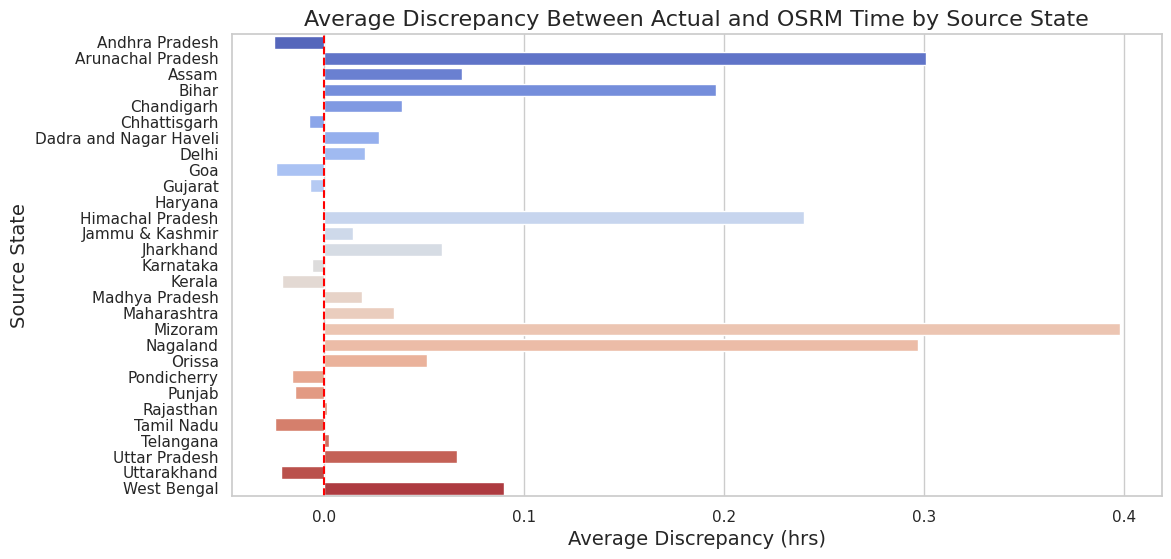

In [156]:
# Calculate the discrepancy
trip_aggregated_df['discrepancy'] = trip_aggregated_df['actual_time'] - trip_aggregated_df['osrm_time']

# Aggregate the data by source state to get the average discrepancy
state_discrepancy = (trip_aggregated_df
                     .groupby('source_state')['discrepancy']
                     .mean()
                     .reset_index())

# Sort the values for better visualization
state_discrepancy = state_discrepancy.sort_values(by='discrepancy', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='discrepancy', y='source_state', data=state_discrepancy, palette='coolwarm')
plt.title('Average Discrepancy Between Actual and OSRM Time by Source State', fontsize=16)
plt.xlabel('Average Discrepancy (hrs)', fontsize=14)
plt.ylabel('Source State', fontsize=14)
plt.axvline(0, color='red', linestyle='--')  # Line at zero discrepancy
plt.show()


#### **Inferences and Recommendations**

> **Inferences :**  

- **Discrepancy Analysis by State:** The chart visualizes the average discrepancy between actual time and OSRM-predicted time for various source states. **Gujarat** shows the highest negative discrepancy, indicating that deliveries here are much faster than the predicted OSRM time. On the contrary, states like **West Bengal**, **Uttarakhand**, and **Uttar Pradesh** exhibit significant positive discrepancies, meaning deliveries are taking much longer than expected.
- **Regional Variations:** States in the **north and east regions** (like **Uttar Pradesh**, **West Bengal**, **Uttarakhand**) exhibit higher-than-expected delivery times, suggesting operational delays. Meanwhile, states like **Gujarat**, **Chandigarh**, and **Arunachal Pradesh** show faster-than-expected delivery times, highlighting more efficient operations.
- **Operational Bottlenecks:** The large positive discrepancies in states such as **West Bengal** and **Uttar Pradesh** may indicate infrastructural or logistical challenges that need to be addressed. These could include factors like traffic congestion, warehouse delays, or poor road conditions.

> **Recommendations :**

- **Focus on States with High Positive Discrepancy:** Delhivery should investigate states such as **West Bengal**, **Uttarakhand**, and **Uttar Pradesh**, where the average discrepancy is significantly positive. Optimizing operations here can help reduce delays and improve delivery performance.
- **Leverage Learnings from Efficient States:** States like **Gujarat** and **Arunachal Pradesh** demonstrate faster-than-predicted delivery times. Delhivery can analyze the operational strategies used in these states and apply similar methods to underperforming regions.
- **Address Logistical Delays:** For states with high discrepancies, it’s important to assess the specific causes of delays, whether it’s due to last-mile connectivity issues, warehouse inefficiencies, or supply chain management. Taking corrective actions, such as route optimization or adjusting delivery schedules, can help in reducing these delays.
- **Monitor and Adjust Predictions:** The discrepancies suggest that the OSRM model’s time predictions may need to be fine-tuned for certain regions. By incorporating real-time data from these states, Delhivery can improve the accuracy of delivery time predictions and adjust resource allocation accordingly.


### **Plot Destination States with Most and Least Orders**

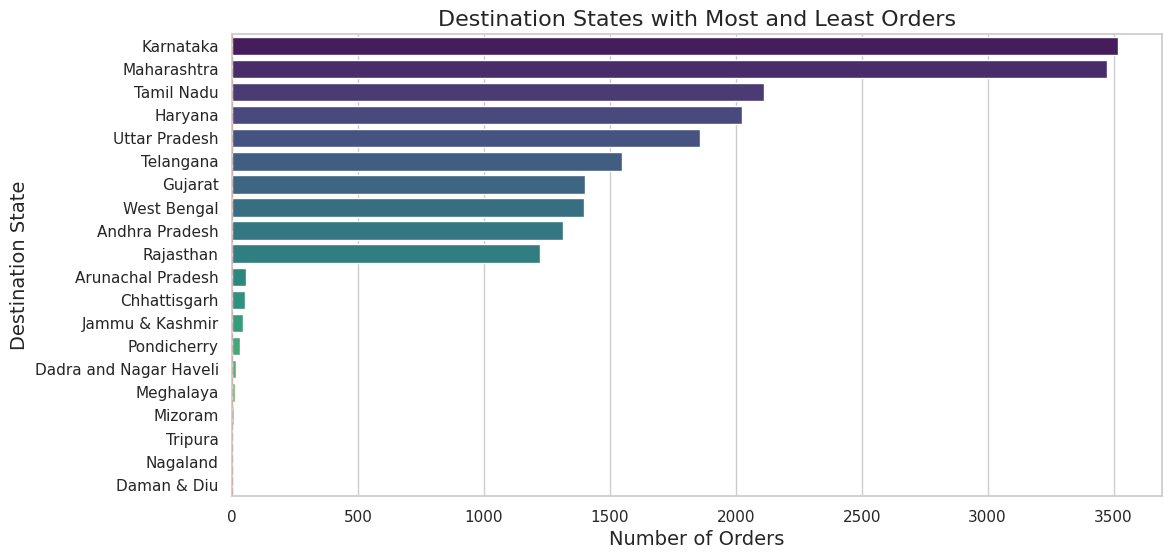

In [157]:
# Count the number of orders per destination state
destination_order_counts = (segment_aggregated_df
                             .groupby('destination_state')
                             .size()
                             .reset_index(name='order_count'))

# Sort the DataFrame by order_count
destination_order_counts = destination_order_counts.sort_values(by='order_count', ascending=False)

# Get the top 10 states with the most orders
most_orders = destination_order_counts.head(10)

# Get the bottom 10 states with the least orders
least_orders = destination_order_counts.tail(10)

# Combine the two DataFrames
combined_orders = pd.concat([most_orders, least_orders])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='destination_state', data=combined_orders, palette='viridis')
plt.title('Destination States with Most and Least Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Destination State', fontsize=14)
plt.axvline(0, color='red', linestyle='--')  # Optional: Line at zero
plt.show()


#### **Inferences and Recommendations**

> **Inferences :**

1.  **Top-Performing States :**
  - **Karnataka** stands out as the top state with the highest number of orders, reflecting strong consumer demand or product/service adoption in the region.
  - **Maharashtra** and **Tamil Nadu** also show a significant volume of orders, indicating that these states have well-established markets with robust purchasing power.

2.  **Middle-Performing States :**
  - States such as **Haryana**, **Uttar Pradesh**, **Telangana**, **Gujarat**, and **West Bengal** receive a moderate number of orders, suggesting stable market demand in these regions. This implies a relatively balanced consumer base.

3.  **Bottom-Performing States :**
  - **Dadra and Nagar Haveli**, **Meghalaya**, **Mizoram**, **Tripura**, **Nagaland**, and **Daman & Diu** have the lowest order volumes, possibly due to smaller populations, economic activity, or limited accessibility to e-commerce and online platforms.

4.  **Overall Observations :**
  - There is a significant disparity in order distribution across India, with a few states receiving a disproportionately larger share of orders.
  - The uneven distribution could be related to factors such as population density, economic development, infrastructure quality, and regional consumer behavior.



> **Recommendations :**

1. **Focus on Top States for Growth:**
   - Since **Karnataka**, **Maharashtra**, and **Tamil Nadu** exhibit strong demand, businesses should concentrate their marketing, sales efforts, and supply chain resources in these states.
   - These regions should be prioritized for launching new products or services, as they show a high level of engagement.

2. **Develop Regional Strategies for Middle States:**
   - For states like **Haryana**, **Uttar Pradesh**, **Telangana**, **Gujarat**, and **West Bengal**, efforts can focus on maintaining the current market while exploring opportunities to boost customer engagement through regional promotions or targeted advertisements.
   - Evaluate specific market needs in these regions to optimize offerings.

3. **Explore Growth Opportunities in Low-Performing States:**
   - The states with lower order volumes present opportunities for untapped market growth. These areas may require more logistical planning or better accessibility to e-commerce platforms.
   - A detailed market analysis should be conducted to understand the challenges and potential in these regions, considering factors like local infrastructure and consumer readiness.

4. **Address Disparities in Infrastructure and Accessibility:**
   - The gap in order volumes may also reflect the difference in infrastructure and connectivity. Investing in better logistics, transportation, and digital infrastructure in lower-performing states could encourage greater market participation.

5. **Tailor Marketing Campaigns to Regional Preferences:**
   - Recognizing regional preferences and tailoring marketing campaigns to match cultural and economic conditions will likely improve penetration in both top and lower-performing states.

6. **Leverage Data for Future Expansion Plans:**
   - Use data on regional discrepancies to inform future expansion strategies, identifying high-potential areas for market entry or scaling operations in states with increasing demand.


### **Plot Destination Cities with Most and Least Orders**

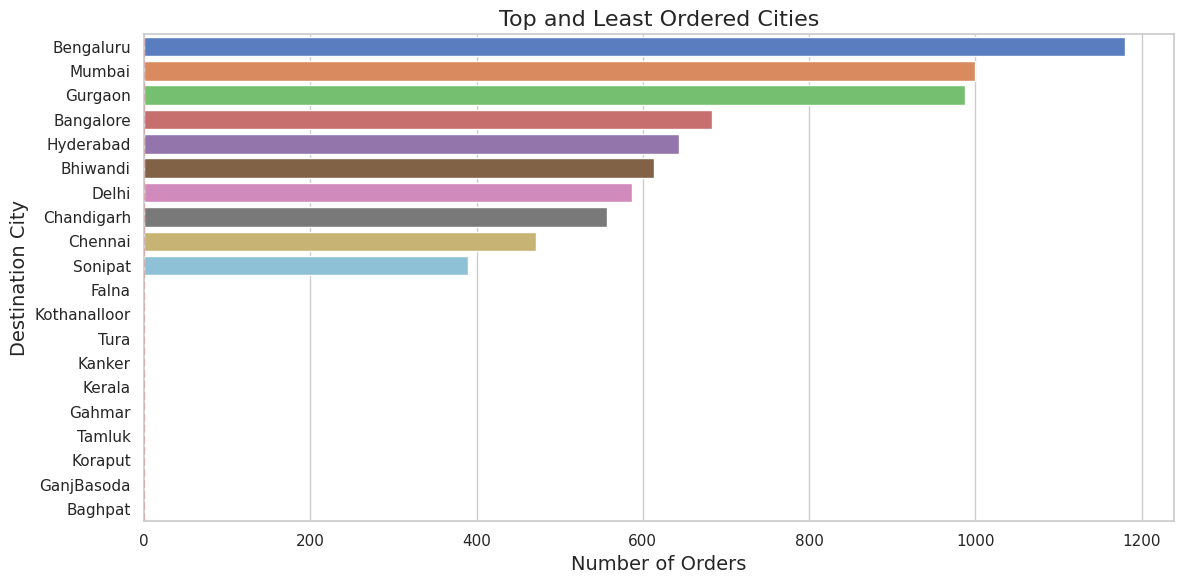

In [158]:
# Sort values to get top and least ordered cities
trip_frequency = (segment_aggregated_df
                  .groupby('destination_city')
                  .size()
                  .reset_index(name='trip_count'))

# Sort by trip_count to identify top and least ordered cities
trip_frequency = trip_frequency.sort_values(by='trip_count', ascending=False)

# Get top 10 and least 10 ordered cities
top_ordered_cities = trip_frequency.head(10)
least_ordered_cities = trip_frequency.tail(10)

# Combine top and least ordered cities
combined_cities = pd.concat([top_ordered_cities, least_ordered_cities])

# Plotting top and least ordered cities
plt.figure(figsize=(12, 6))
sns.barplot(x='trip_count', y='destination_city', data=combined_cities, palette='muted')

plt.title('Top and Least Ordered Cities', fontsize=16)
plt.xlabel('Number of Orders', fontsize=14)
plt.ylabel('Destination City', fontsize=14)
plt.axvline(0, color='red', linestyle='--')  # Optional: Line at zero
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

#### **Inferences and Recommendations**

> **Inferences :**

1.  **Top-Performing Cities :**
   - **Bengaluru** stands out as the city with the highest number of orders, reflecting strong consumer demand or product/service adoption in the region.
   - **Mumbai** and **Gurgaon** also show significant order volumes, indicating thriving markets and well-established purchasing power in these cities.

2.  **Middle-Performing Cities :**
   - Cities such as **Hyderabad**, **Bhiwandi**, and **Delhi** receive a moderate number of orders, suggesting stable market demand in these regions. These areas likely have a balanced consumer base, maintaining steady market activity.

3.  **Bottom-Performing Cities :**
   - **Baghpat** exhibits the lowest number of orders. Factors like smaller population size, lower economic activity, or limited accessibility to online platforms could be contributing to the low order volume.

4.  **Overall Observations :**
   - There is a significant disparity in order distribution across Indian cities, with a few cities receiving a disproportionately higher number of orders.
   - The uneven distribution could be due to factors such as population density, economic development, infrastructure quality, and regional consumer behavior.


> **Recommendations :**

1. **Focus on Top Cities for Growth:**
   - Since **Bengaluru**, **Mumbai**, and **Gurgaon** exhibit strong demand, businesses should focus their marketing, sales efforts, and logistics operations in these cities.
   - These cities should be prioritized for launching new products or services as they show a high level of engagement.

2. **Maintain and Expand in Middle Cities:**
   - For cities like **Hyderabad**, **Bhiwandi**, and **Delhi**, efforts should focus on maintaining market share while exploring opportunities for growth through regional promotions or targeted campaigns.
   - Evaluate specific needs in these regions to tailor product offerings and marketing strategies.

3. **Explore Opportunities in Low-Performing Cities:**
   - **Baghpat** and other low-performing cities present potential opportunities for market growth. These regions may require better logistical planning or increased accessibility to e-commerce platforms.
   - A deeper market analysis should be conducted to identify challenges and opportunities for scaling operations in these cities.

4. **Address Regional Disparities:**
   - The gap in order volumes could be a reflection of differences in infrastructure and accessibility. Investing in better logistics, transportation, and digital infrastructure in lower-performing cities could encourage greater market participation.

5. **Tailor Campaigns to City-Specific Needs:**
   - Developing localized marketing campaigns that cater to the specific preferences and needs of consumers in each city will help improve market penetration in both top and lower-performing regions.

6. **Utilize Data for Expansion:**
   - Use the data on regional order discrepancies to guide future expansion plans, identifying high-potential areas for scaling operations or entering new markets.


### **Plot Number of Trips Created per Weekday**

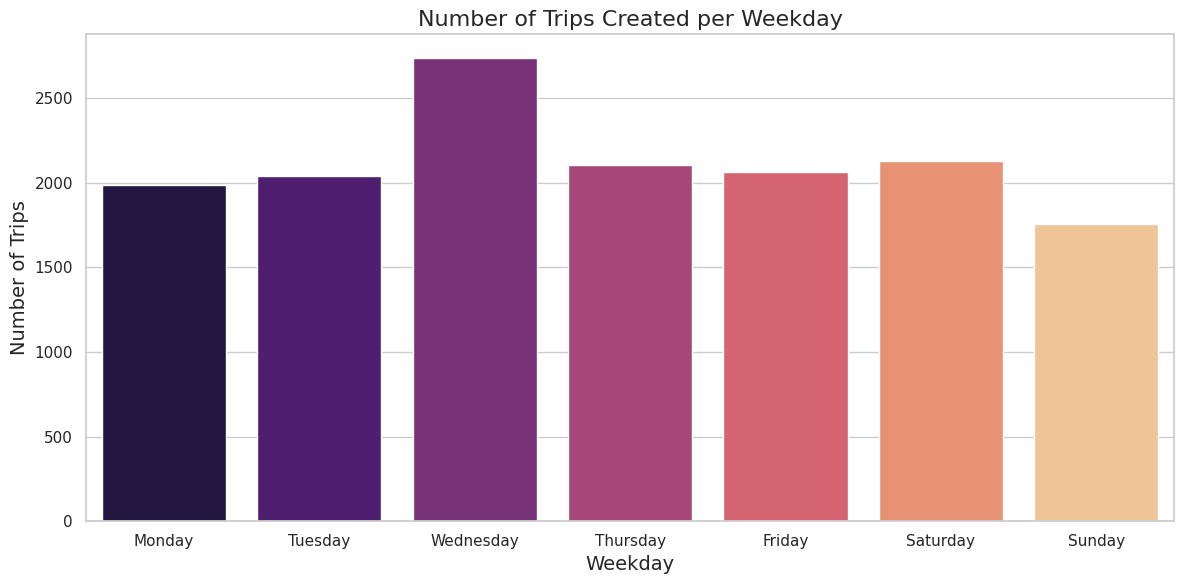

In [159]:
# Count the number of trips created in each weekday from the trip_aggregated_df
trips_per_weekday = trip_aggregated_df['trip_creation_weekday'].value_counts().sort_index()

# Define weekday labels for better readability
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plotting the number of trips created in each weekday
plt.figure(figsize=(12, 6))
sns.barplot(x=trips_per_weekday.index, y=trips_per_weekday.values, palette='magma')

# Customize the plot
plt.title('Number of Trips Created per Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(ticks=range(7), labels=weekday_labels)  # Set custom labels for x-axis
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


#### **Inferences and Recommendations**

> **Inferences :**

1.  **Trip Distribution:**
   - The highest number of trips occurs on **Wednesday**, followed by **Thursday** and **Friday**. This indicates peak travel days during the mid-week.
   - Conversely, **Sunday**, **Monday**, and **Tuesday** show the lowest trip numbers, suggesting reduced demand at the start and end of the week.

> **Recommendations :**

1. **Optimize Resources for Peak Days:**
   - Focus operational resources and marketing efforts on **Wednesday**, **Thursday**, and **Friday** to cater to higher demand and maximize efficiency.

2. **Promote Off-Peak Days:**
   - Develop targeted promotions or incentives to encourage travel on **Sunday**, **Monday**, and **Tuesday**, potentially balancing demand throughout the week.

3. **Analyze Trip Patterns:**
   - Conduct further analysis on factors influencing trip frequency on specific days to inform strategic decisions and improve overall service offerings.


# **Recommendations and Insights of Case Study**

1. **Prioritize High-Traffic Corridors**: Identify the most commonly used routes and source-destination corridors.
   Focus resources such as additional delivery vehicles, optimized scheduling, and route monitoring on these corridors to enhance speed and efficiency.
   By improving traffic flow in these areas, overall delivery times can be reduced, and operational bottlenecks avoided.

2. **Enhance Route Efficiency**: Based on time and distance patterns, regularly update route algorithms to avoid areas of heavy congestion or delays.
   Utilize route optimization software to identify the fastest and shortest routes while accounting for live traffic data to minimize travel times and fuel consumption.

3. **Investigate Delayed Routes**: Identify routes or locations where actual travel times significantly deviate from predicted times.
   Investigate causes of these discrepancies, such as traffic congestion, road conditions, or inaccurate travel predictions.
   Implement changes in these areas, such as rerouting or scheduling adjustments, to reduce delays.

4. **Implement Predictive Adjustments**: Analyze past data to identify patterns of frequent delays, traffic jams, or increased delivery times.
   Use these insights to implement proactive adjustments to the routes or delivery times in high-risk areas.
   For example, avoid certain routes during peak traffic hours or days of the week.

5. **Allocate Resources Based on Demand**: Adjust delivery vehicle numbers, personnel, and shift timings based on the demand in high-traffic routes or times.
   Provide more resources where needed, particularly during peak delivery periods, to prevent service slowdowns and ensure customer satisfaction.

6. **Regular Comparison of Actual vs. Predicted Travel Times**: Regularly compare actual travel times with predicted times from the OSRM (or similar) software.
   Use this data to continuously refine and update route planning software, increasing prediction accuracy and reducing errors.

7. **Improve Communication with Drivers**: Implement real-time communication systems with delivery drivers, updating them on optimal routes, traffic conditions, or reroutes in case of delays.
   By ensuring that drivers are constantly informed, they can adapt to changing conditions and avoid time-consuming delays.

8. **Optimize Delivery Schedules**: Consider reshuffling delivery schedules based on travel times and peak traffic patterns.
   For example, schedule deliveries during off-peak hours for high-traffic routes, enabling faster trips and reducing operational stress during peak hours.

9. **Focus on Shorter Distances for Quick Deliveries**: For fast deliveries, ensure routes chosen prioritize shorter distances while still avoiding high-traffic zones.
   This will help reduce fuel costs, operational expenses, and delivery times, leading to improved customer satisfaction.

10. **Focus on Delivery Efficiency in Key Segments**: Focus on improving the logistics of specific segments within your supply chain that consistently cause delays.
    For example, implement quicker loading and unloading procedures at warehouses or work with suppliers to improve supply chain times.

11. **Continuous Performance Monitoring**: Use ongoing data collection to monitor route performance.
    This will allow the business to make informed decisions about route changes and optimizations based on real-time data. Regular monitoring ensures that routes remain efficient even as conditions change.

12. **Adopt Dynamic Routing for High Demand**: Implement a dynamic routing system that automatically adjusts routes based on real-time data, traffic conditions, and demand.
    This can be achieved through machine learning models or advanced logistics software that automatically suggests better route alternatives in high-demand times.

13. **Integrate Customer Feedback for Better Planning**: Use customer feedback to identify areas where delivery delays frequently occur.
    By correlating feedback with logistical data, businesses can optimize routes in areas where customers have reported slower deliveries.

14. **Enhance Driver Training for Route Management**: Provide additional training for drivers to help them manage routes better, particularly in areas prone to congestion or difficult road conditions.
    This will ensure drivers can make informed decisions when unexpected changes occur on their routes.

15. **Reduce Vehicle Idle Time**: Look at areas where vehicles are spending excessive time idle, such as waiting for loading or unloading.
    Reduce these times by implementing faster processes at hubs or automating loading systems where possible.

16. **Implement Incentives for Faster Delivery**: To encourage faster and more efficient deliveries, consider implementing performance-based incentives for drivers.
    For example, rewarding drivers who consistently complete deliveries on time can lead to more proactive route management and improved delivery times.

17. **Monitor Traffic Patterns Regularly**: Regularly monitor traffic patterns using available data from mapping services or traffic reports to ensure routes stay optimized.
    Ensure that drivers and logistics planners have access to the most up-to-date traffic information to make real-time decisions about route changes.

18. **Improve Communication with Warehouses**: Ensure that warehouse operations are in sync with delivery schedules to avoid delays in loading and unloading.
    Implement scheduling systems that alert warehouses to the expected arrival of delivery vehicles, ensuring quick processing.

19. **Invest in Route Prediction Software**: Consider investing in advanced route prediction and traffic analysis software that can take into account various factors such as real-time traffic, weather conditions, and road closures.
    This software will help in creating the most optimal delivery routes and can significantly reduce travel times.

20. **Work with Local Authorities for Better Traffic Management**: Engage with local authorities in high-traffic regions to understand potential improvements in road infrastructure or traffic management that could benefit logistics operations.
    Collaborative efforts may result in better traffic flow and fewer bottlenecks on key delivery routes.

